# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [100]:
pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 558.5 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

## Data Overview

- Observations
- Sanity checks

In [3]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

#### Observations:

* There are 340 rows, 15 columns
* 7 floats, 4 ints, and 4 objects

In [6]:
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [7]:
df["Ticker Symbol"].nunique()

340

#### Observations:

* There 340 unique values in Ticker Symbol

In [8]:
df["Security"].nunique()

340

#### Observations:

* There 340 unique values in Security

In [9]:
df["GICS Sector"].nunique()

11

#### Observations:

* There 11 unique values in GICS Sector

In [10]:
df["GICS Sub Industry"].nunique()

104

#### Observations:

* There 104 unique values in GICS Sub Industry

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Plotting histograms and boxplots for all the variables

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
        
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet",
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function from MLS
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = str(p.get_height()) + " (" + str("{:.1f}%".format(
                100 * p.get_height() / total
            )) + ")"  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
# function from MLS
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [14]:
# function from MLS
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [15]:
# iterate through columns and perform appropriate MLS function
def iterate_and_plot_stacked(data, target):
  for column in data.columns:
    if column != target and data[column].dtype == 'object':
      if column != 'case_id':
        print ("\033[1m",target, " vs ", column,"\033[0m")
        stacked_barplot(data, column, target)

In [16]:
# iterate through columns and perform appropriate MLS function
def iterate_and_plot_distr(data, target):
  for column in data.columns:
    if column != target and (data[column].dtype == 'int64' or df[column].dtype == 'float64'):
      if column != 'case_id':
        print ("\033[1m",target, " vs ", column,"\033[0m")
        distribution_plot_wrt_target(data, column, target)

## Univariate Analysis

In [17]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [18]:
df_obj = df.select_dtypes(include = ['object'])
df_obj = df_obj.drop(columns = ["Ticker Symbol", "Security"])

 Current Price 


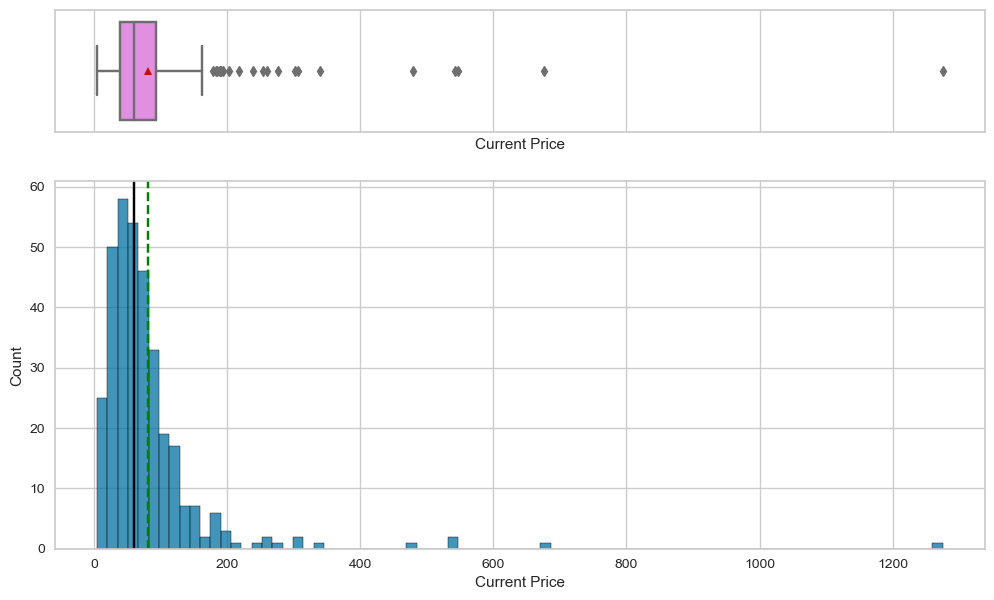

 Price Change 


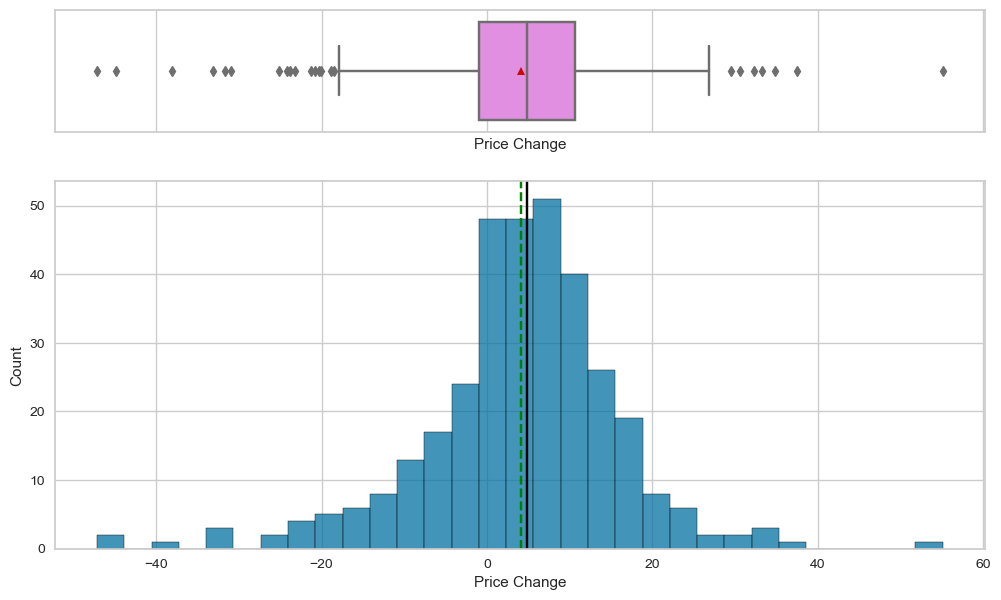

 Volatility 


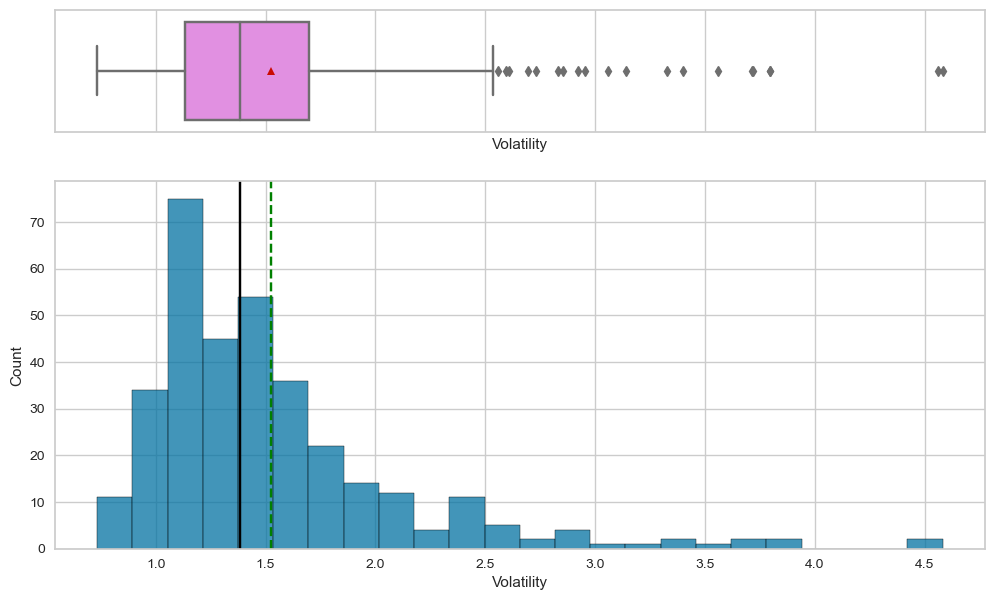

 ROE 


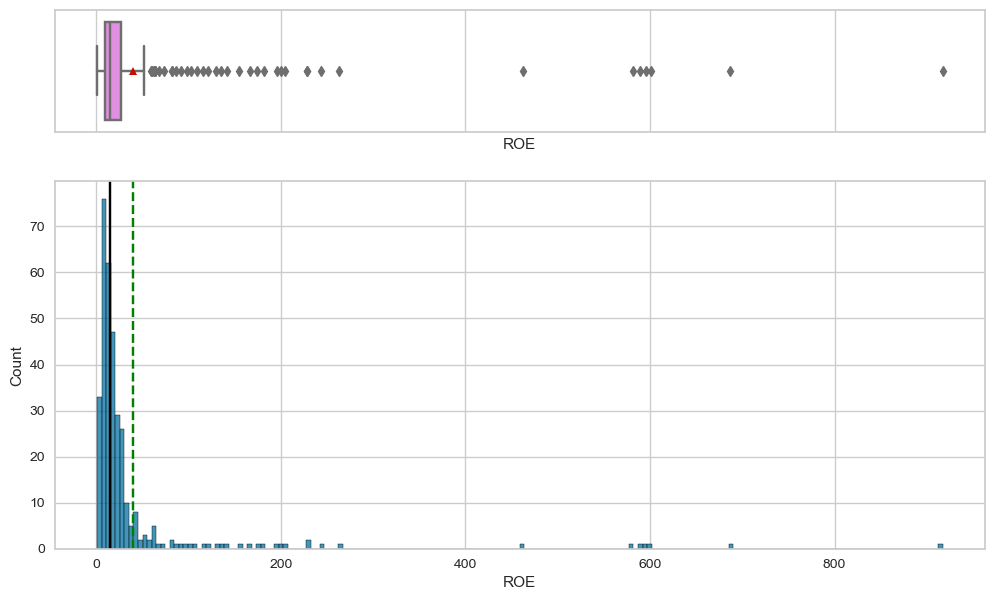

 Cash Ratio 


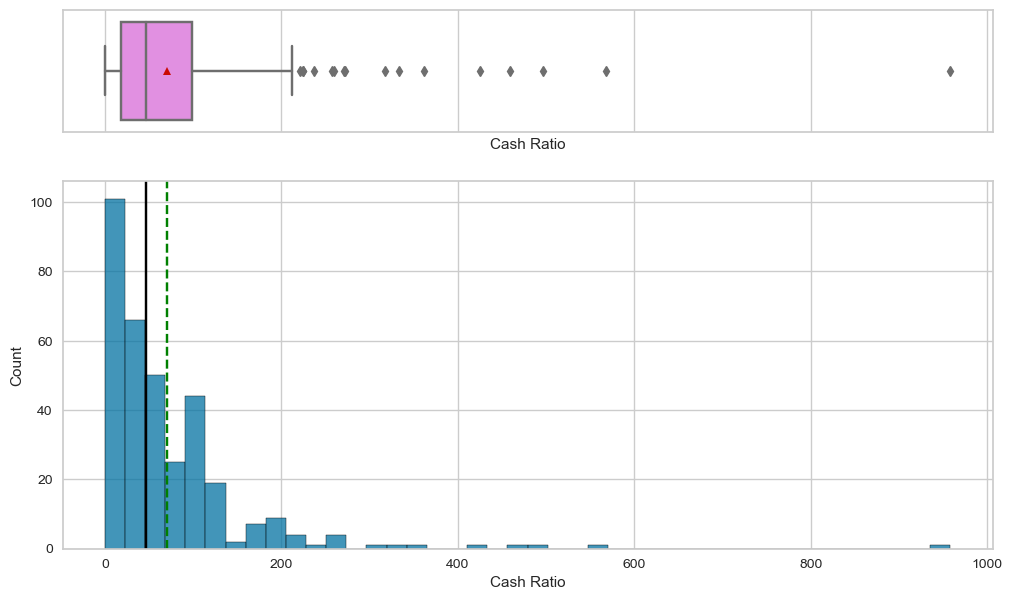

 Net Cash Flow 


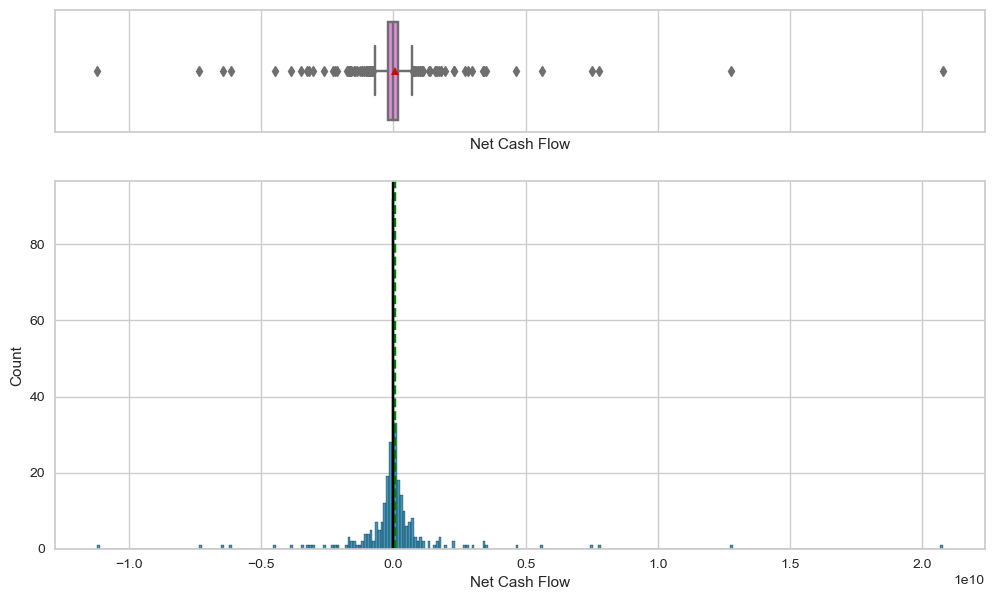

 Net Income 


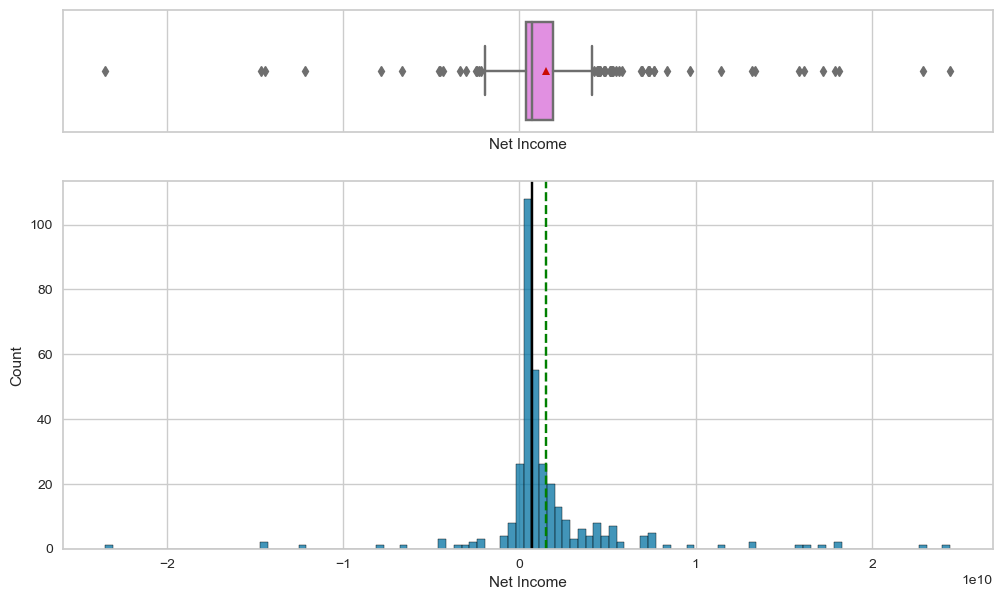

 Earnings Per Share 


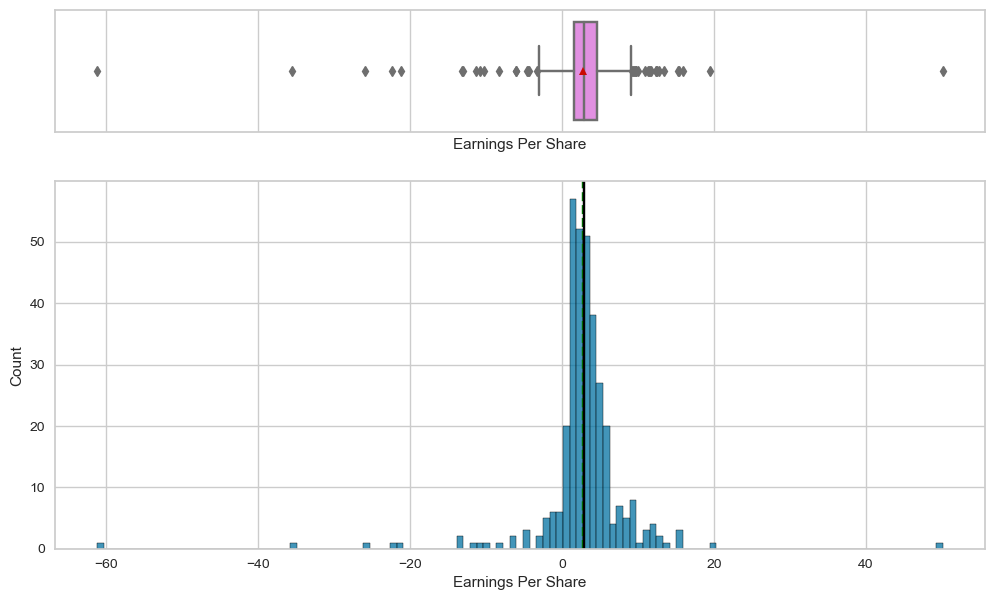

 Estimated Shares Outstanding 


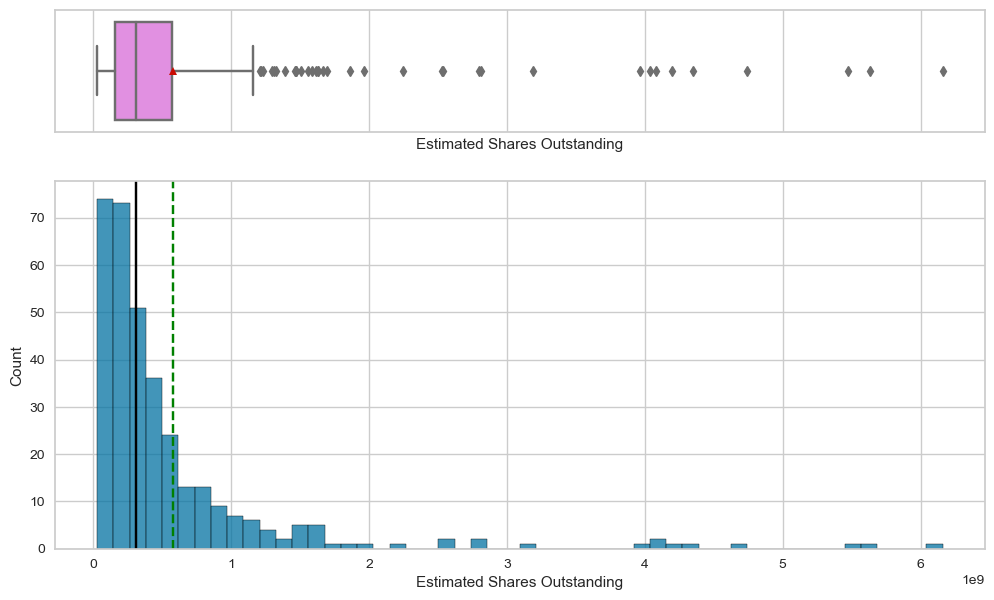

 P/E Ratio 


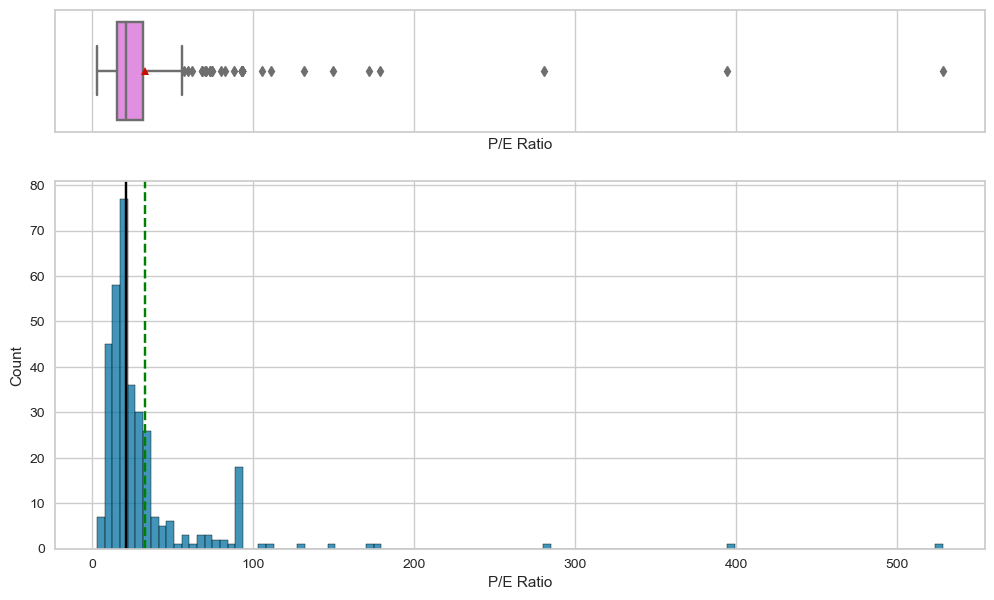

 P/B Ratio 


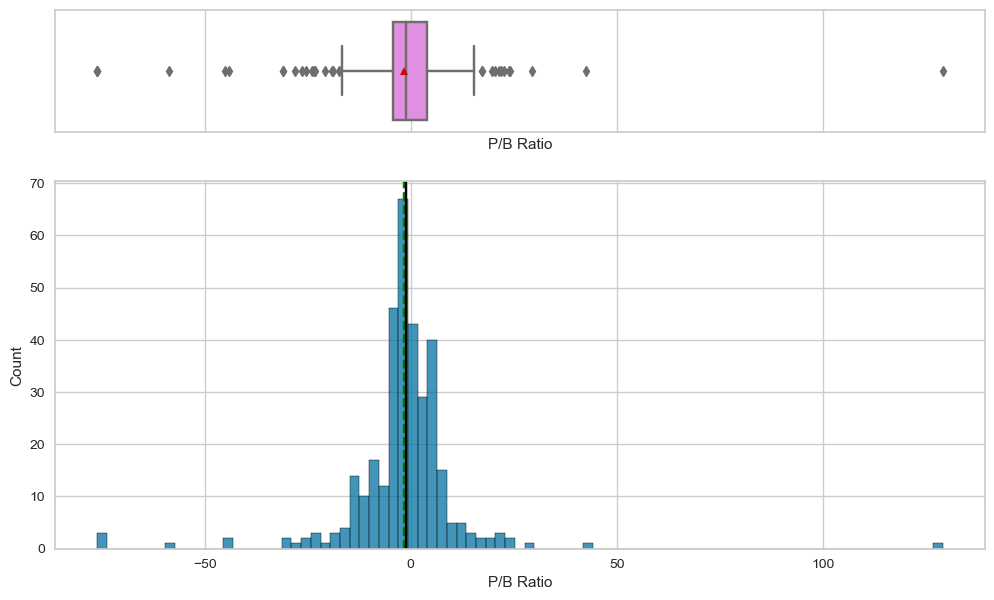

In [19]:
for feature in df_num.columns:
    print("\033[1m", feature, "\033[0m", flush = True)
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)
    plt.show()
    

#### Observations:

* Price Change, Net Income, Net Cash Flow, Earnings Per Share, and P/B Ratio are normally distributed
* Current Price, Volatility, ROE, Cash Ratio, Estimated Shares Outstanding, and P/E Ratio are right skewed
* The distribution of P/E ratio seems bimodal

 GICS Sector 


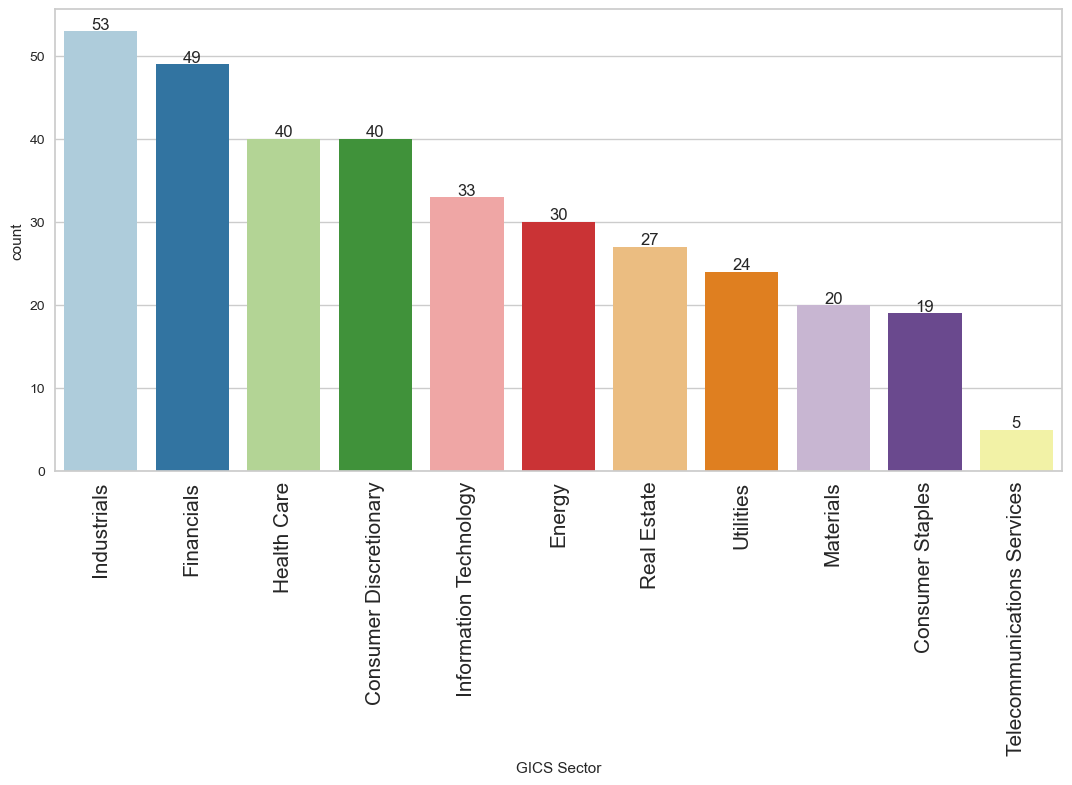

 GICS Sub Industry 


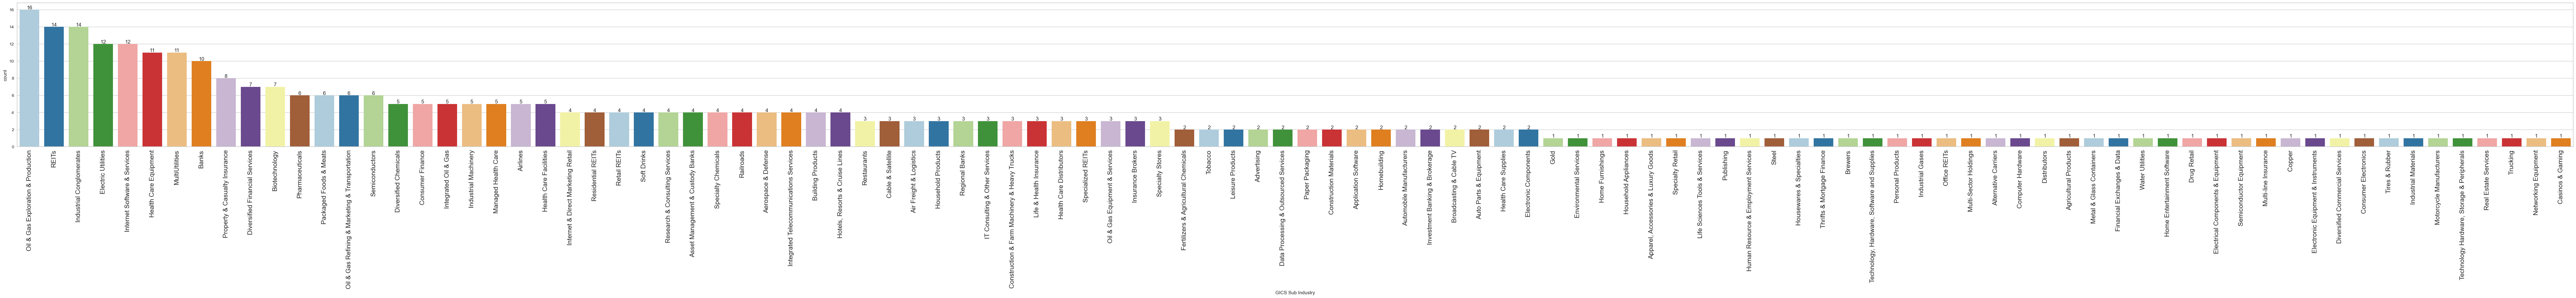

In [20]:
for feature in df_obj.columns:
    print("\033[1m", feature, "\033[0m", flush = True)
    labeled_barplot(df, feature, perc=False, n=None)
    plt.show()

#### Observations:

* Industrials, Financials and Health Care are the most common GICS Sectors in the data set and Telecommunications Services is the least common
* Oil & Gas Exploration & Production, REITs, and Industrial Conglomerates are the most common GICS Sub Industries in this dataset

## Bivariate Analysis

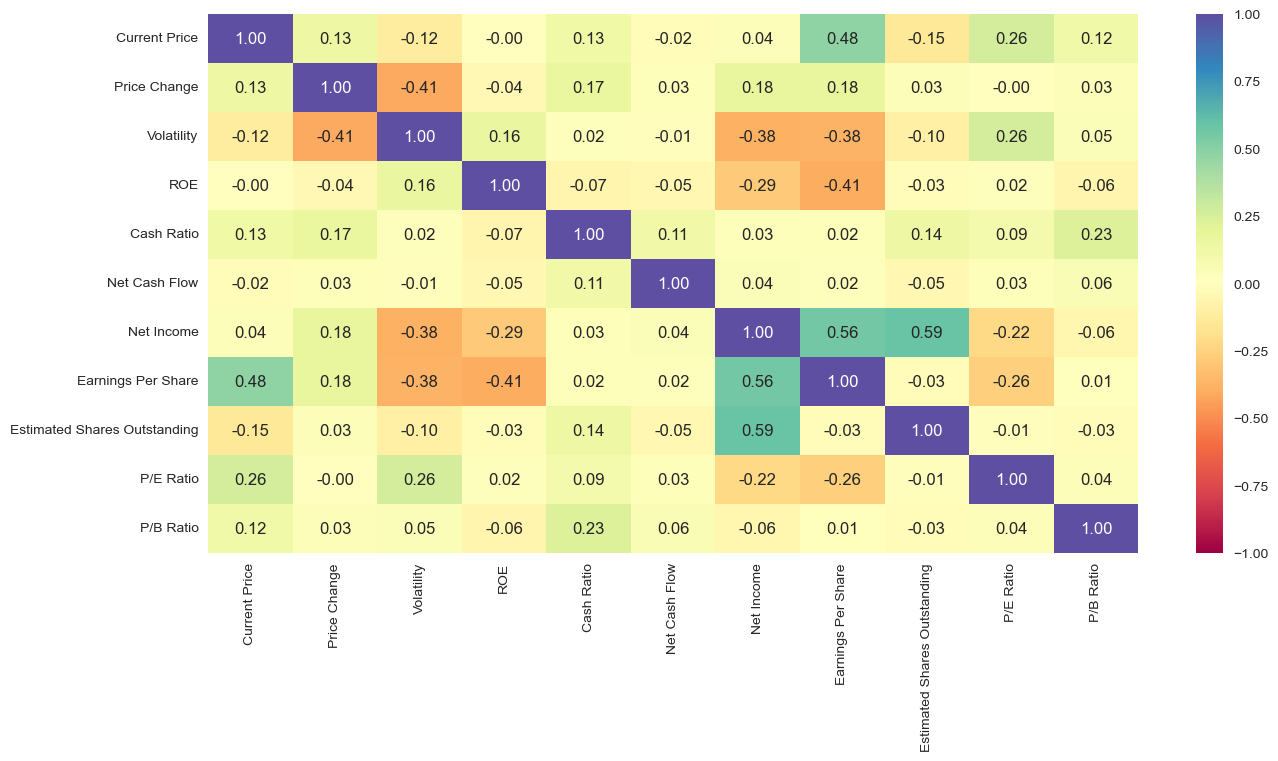

In [21]:
# run a heatmap to check correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

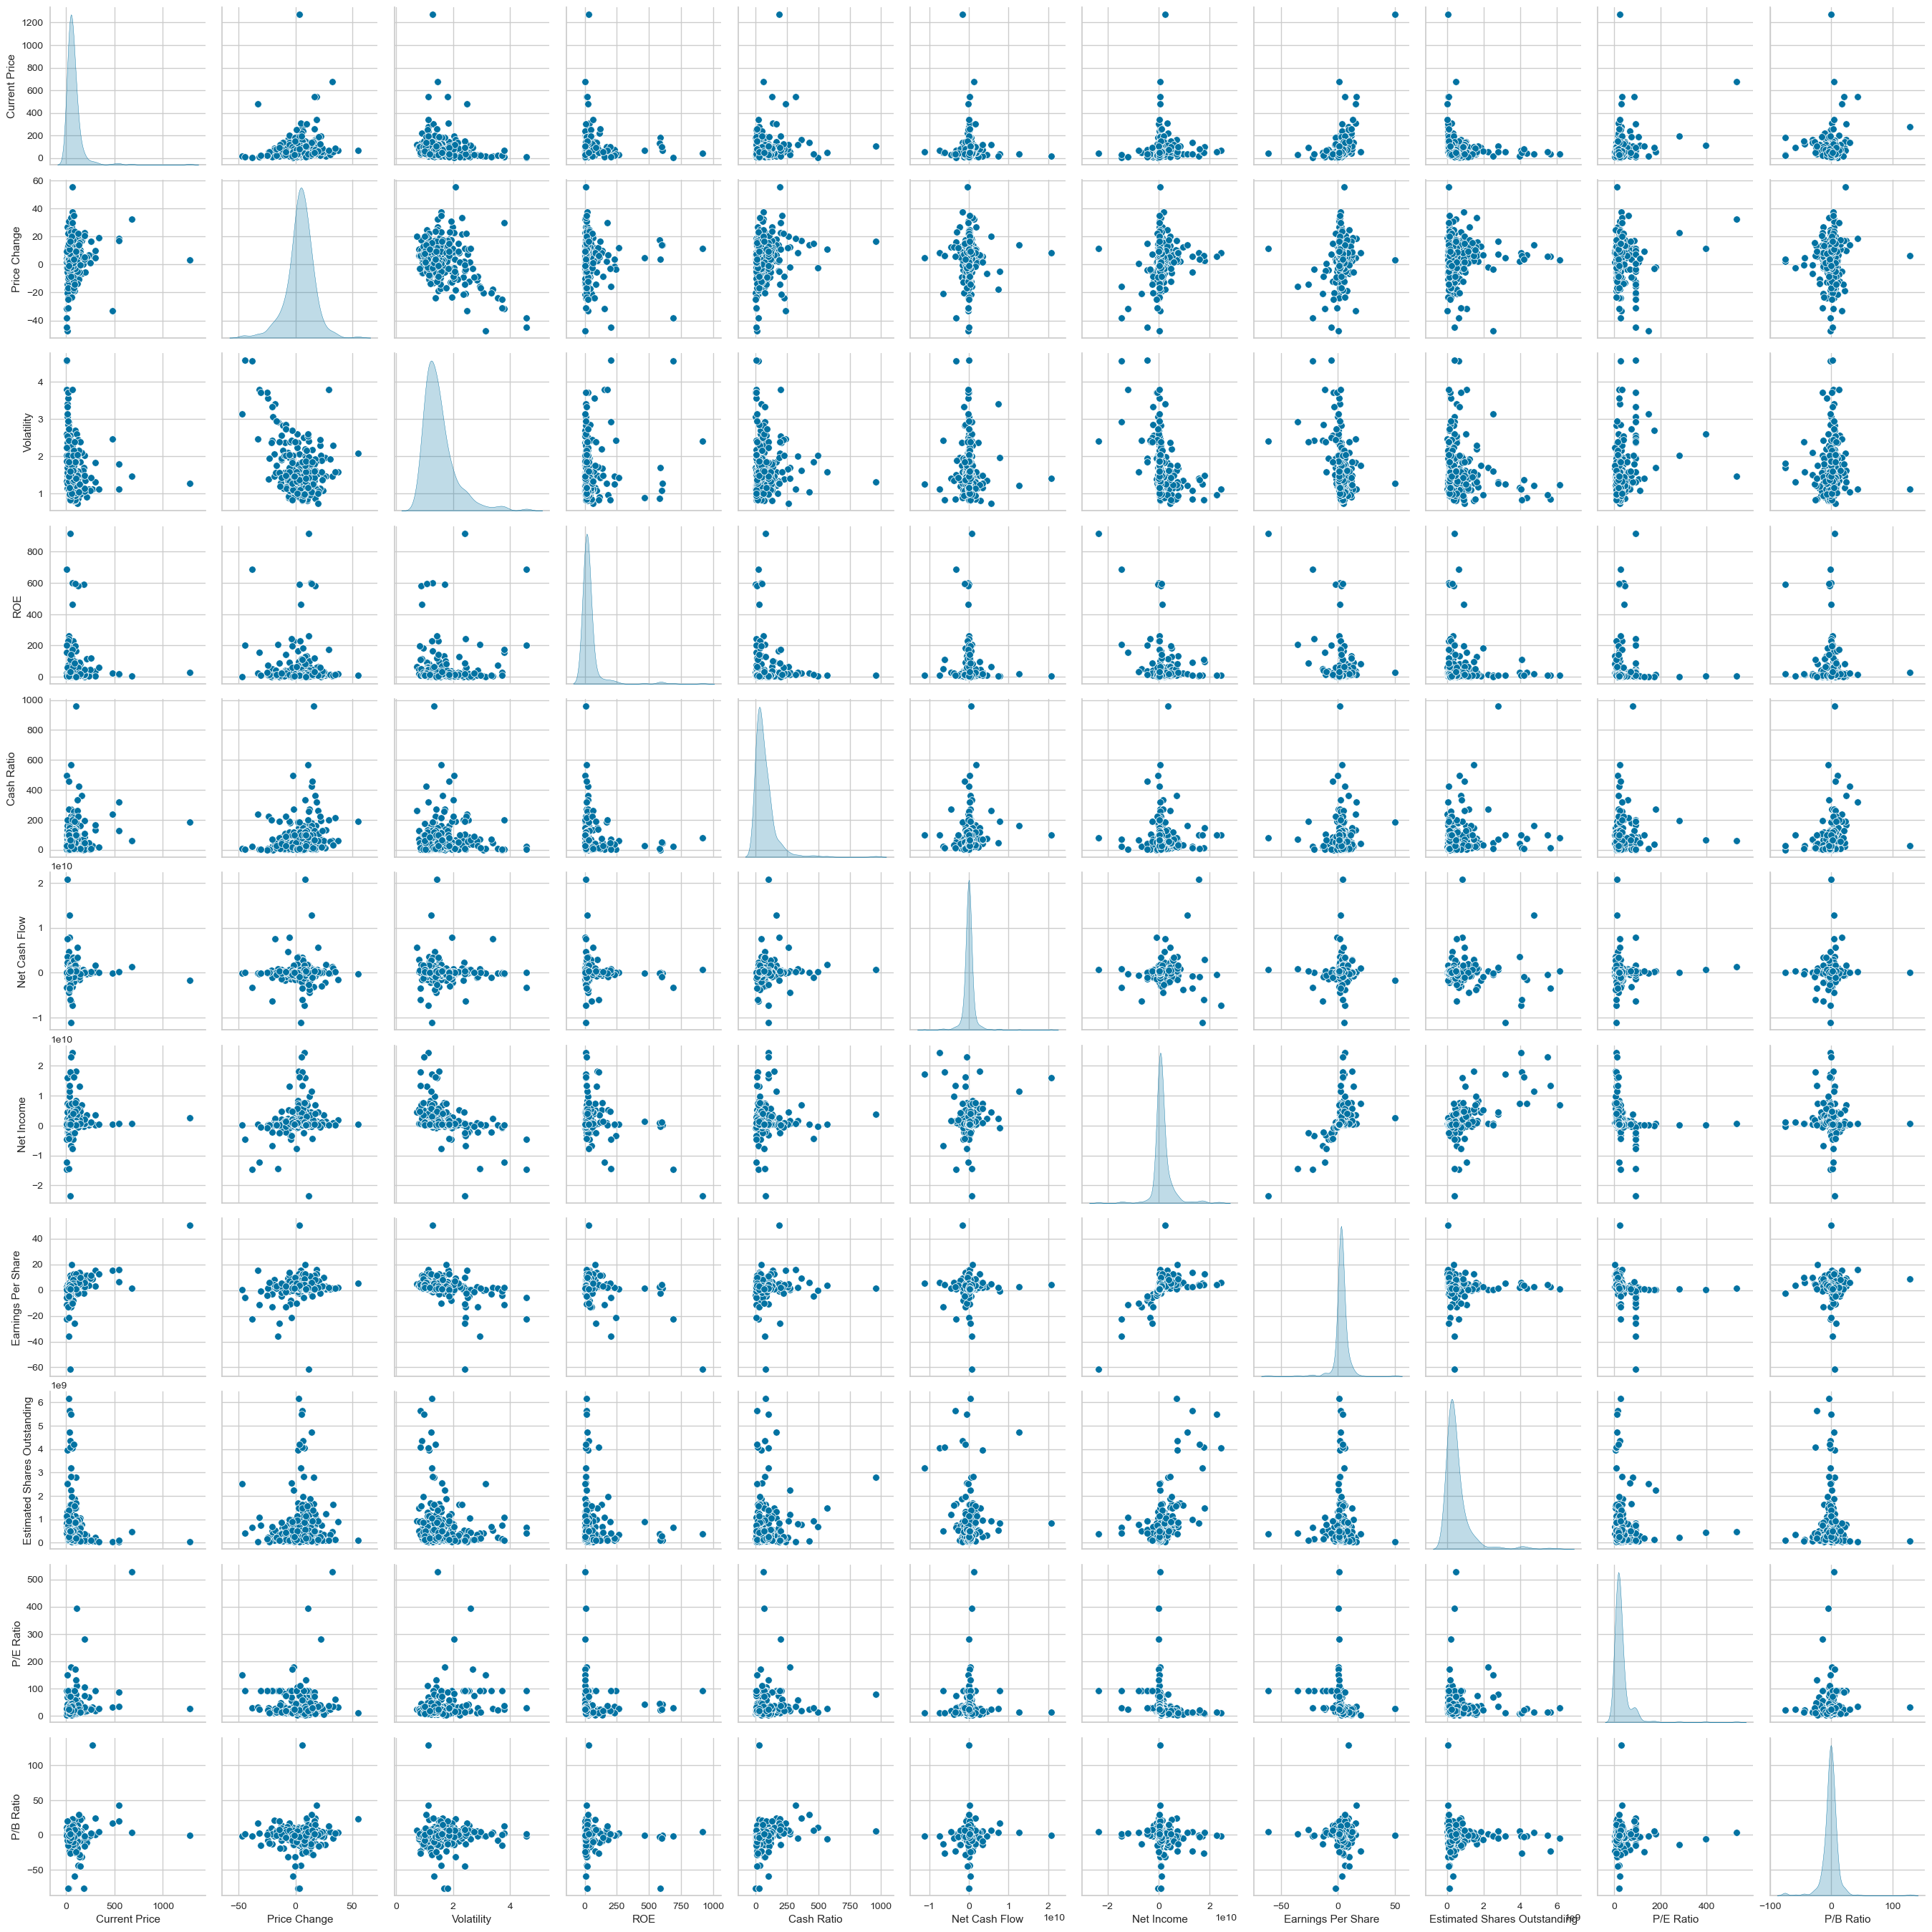

In [22]:
sns.pairplot(data=df_num, diag_kind="kde")
plt.show()

#### Observations:
   
* There are no very highly correlated variables
* Net Income/Earning Per Share (0.59), and Net Income/Earnings Per Share (0.56), and Current Price/Earnings Per Share(0.48) are all mildly correlated 

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### What does the distribution of stock prices look like?

<AxesSubplot:xlabel='Current Price', ylabel='Count'>

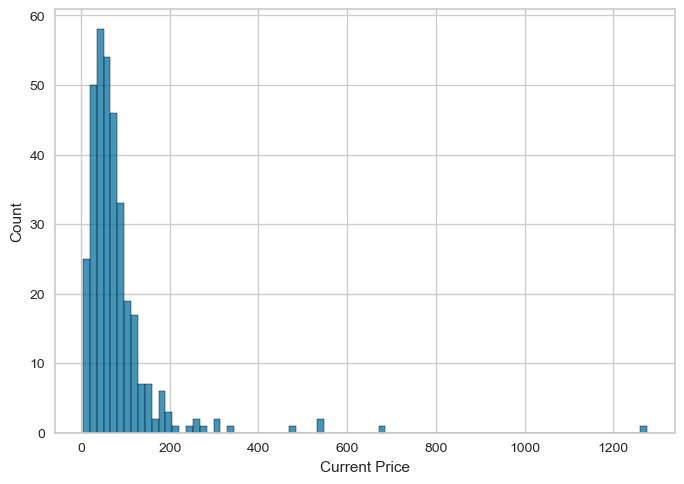

In [23]:
sns.histplot(df, x ='Current Price')

In [24]:
df['Current Price'].describe()

count     340.000000
mean       80.862345
std        98.055086
min         4.500000
25%        38.555000
50%        59.705000
75%        92.880001
max      1274.949951
Name: Current Price, dtype: float64

#### Observations:

* The distribution of stock prices is right skewed. The majority of stock prices are below 100, but the prices reach up to 1274. 

### The stocks of which economic sector have seen the maximum price increase on average?

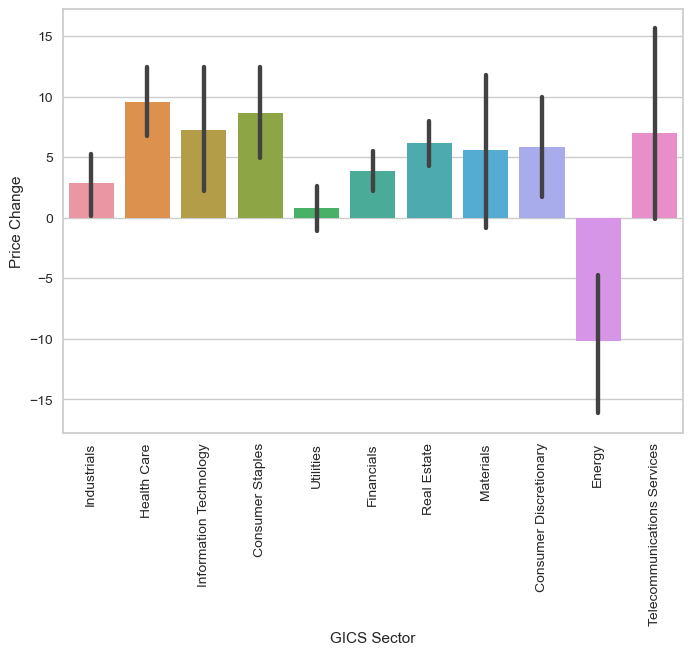

In [25]:
sns.barplot(y = df["Price Change"], x = df["GICS Sector"])
plt.xticks(rotation = 90);

#### Observations:

* It looks like the Health Care sector had the highest overall increase in average price in the past 13 weeks

### How are the different variables correlated with each other?

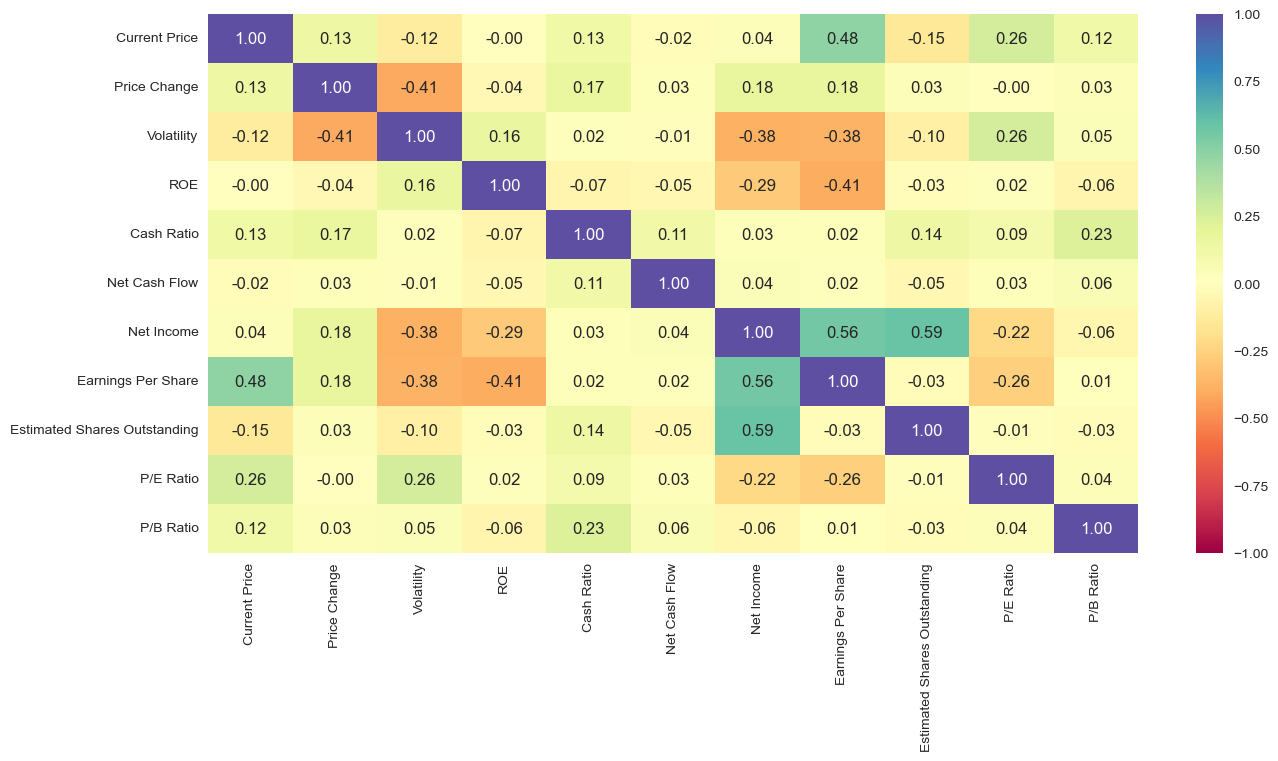

In [26]:
# run a heatmap to check correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

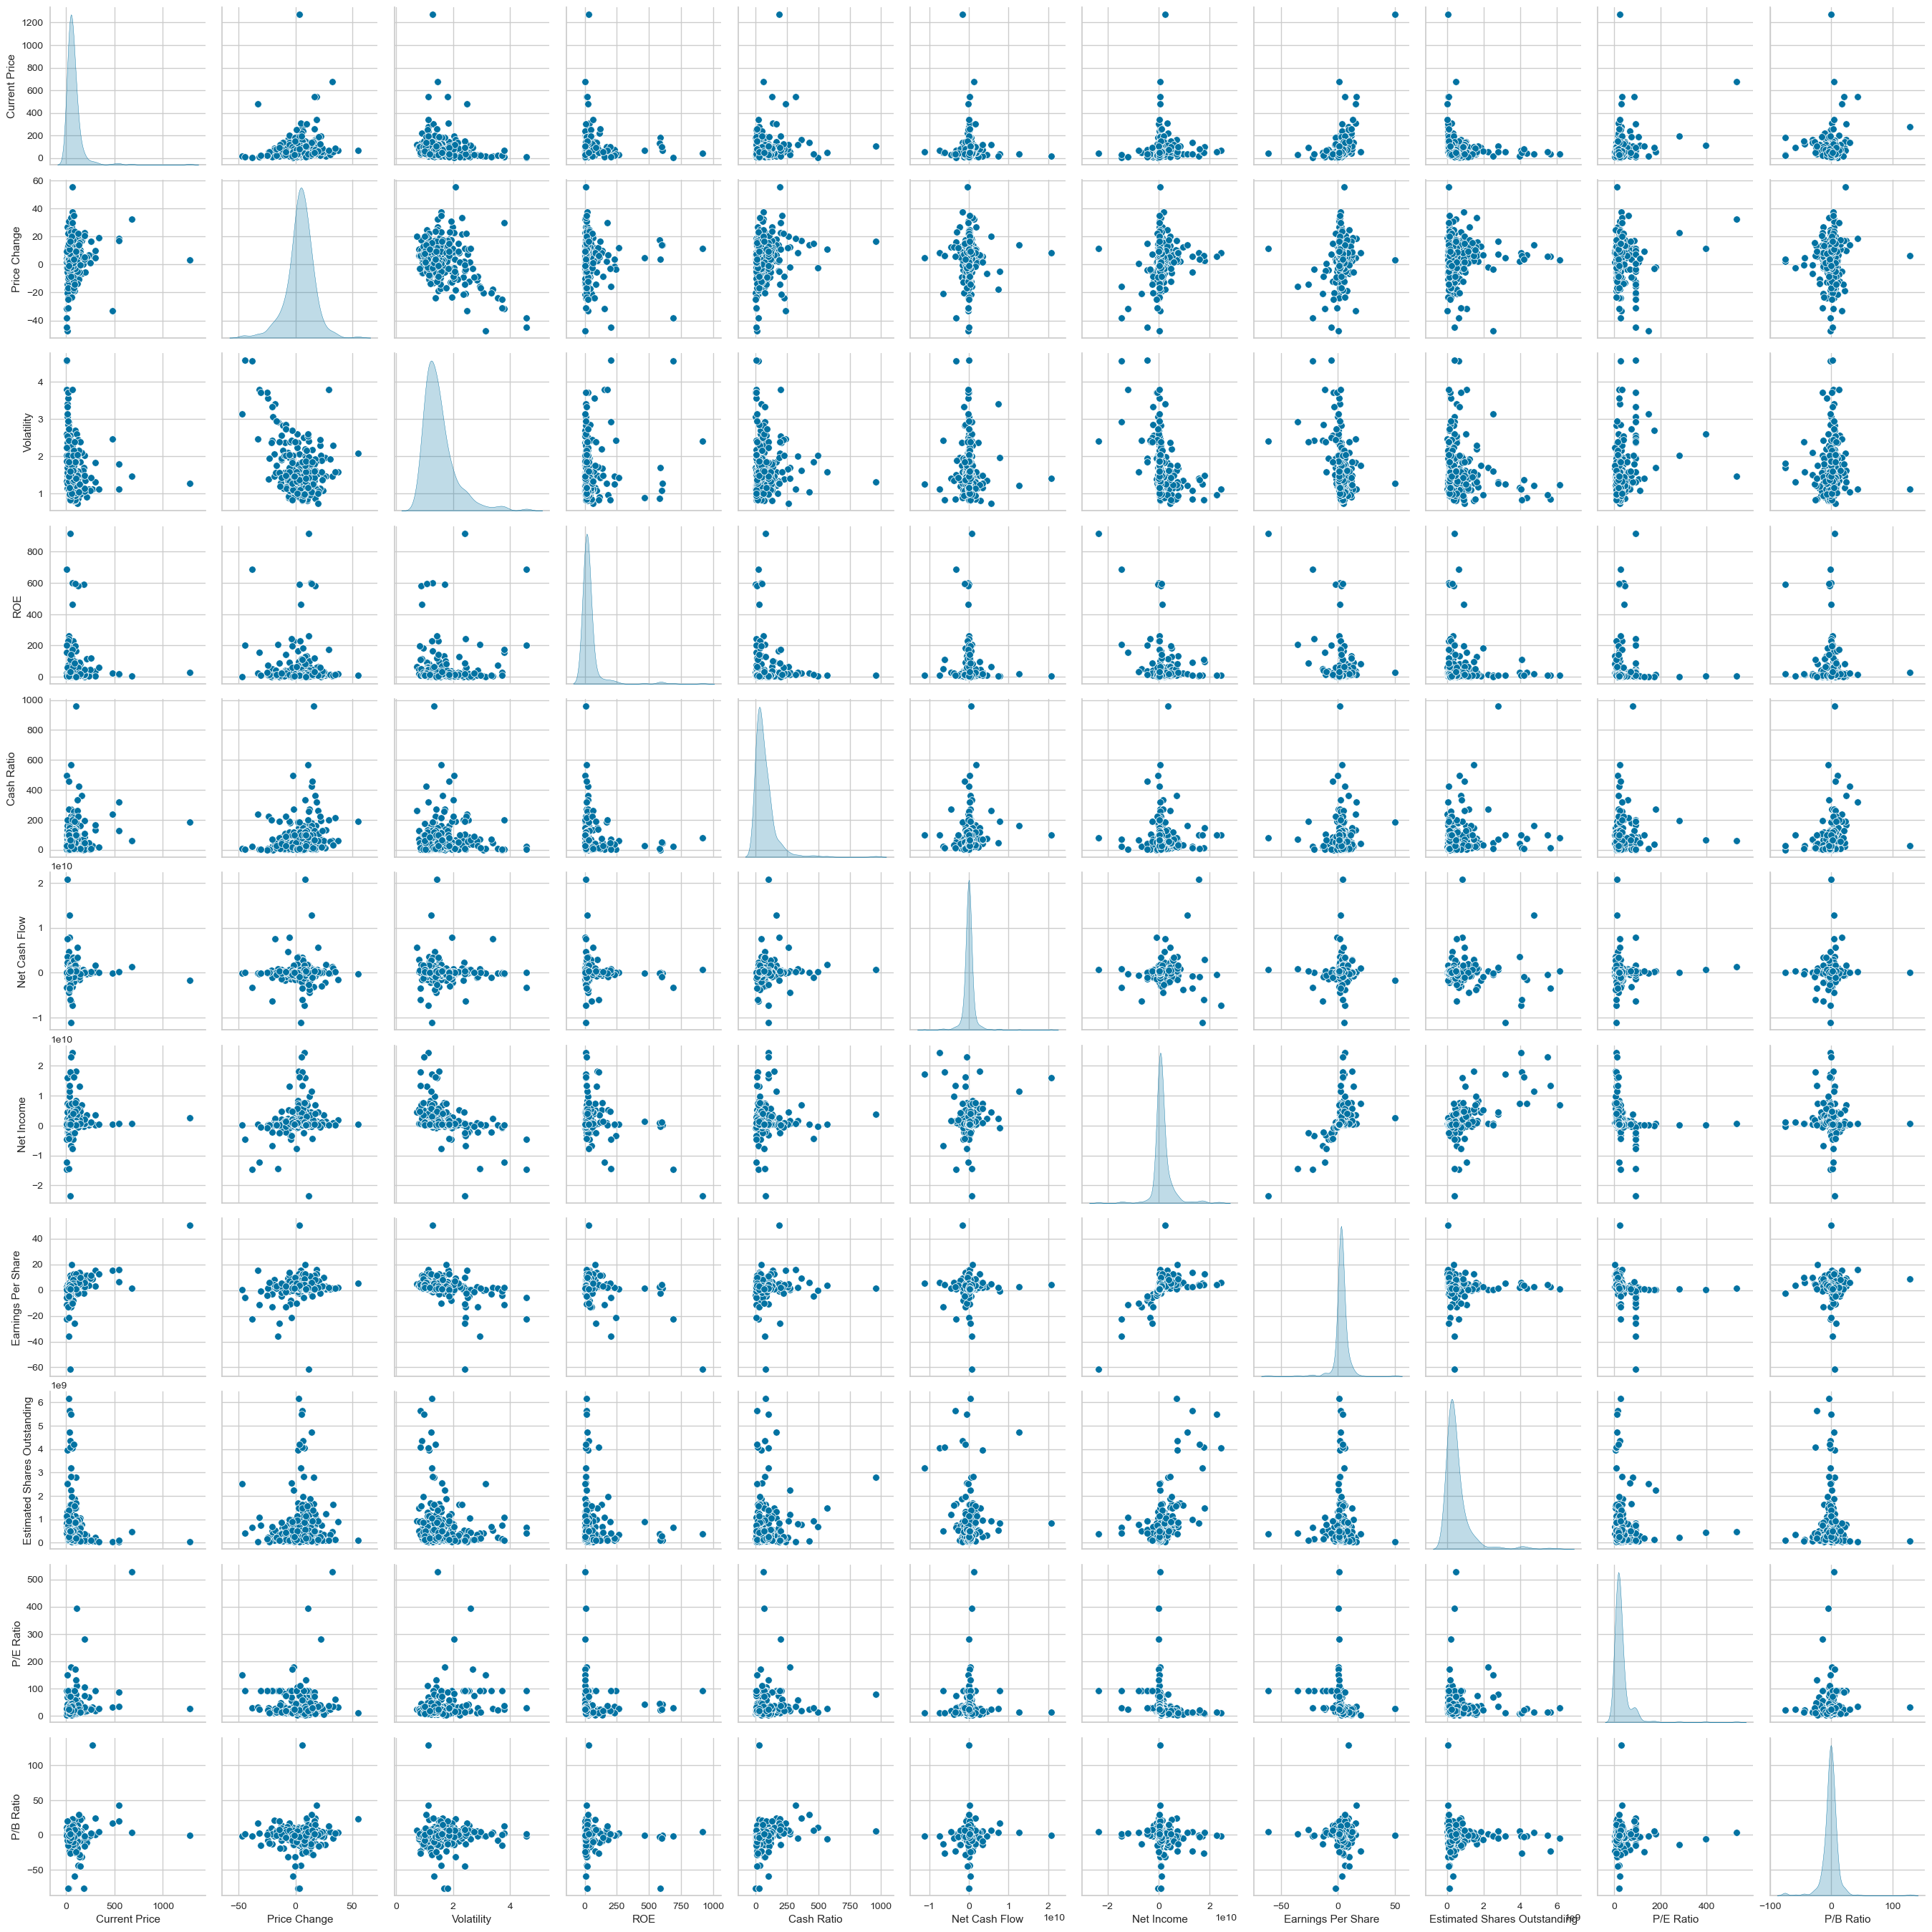

In [27]:
sns.pairplot(data=df_num, diag_kind="kde")
plt.show()

#### Observations:
   
* There are no very highly correlated variables
* Net Income/Earning Per Share (0.59), and Net Income/Earnings Per Share (0.56), and Current Price/Earnings Per Share(0.48) are all mildly correlated 

### Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

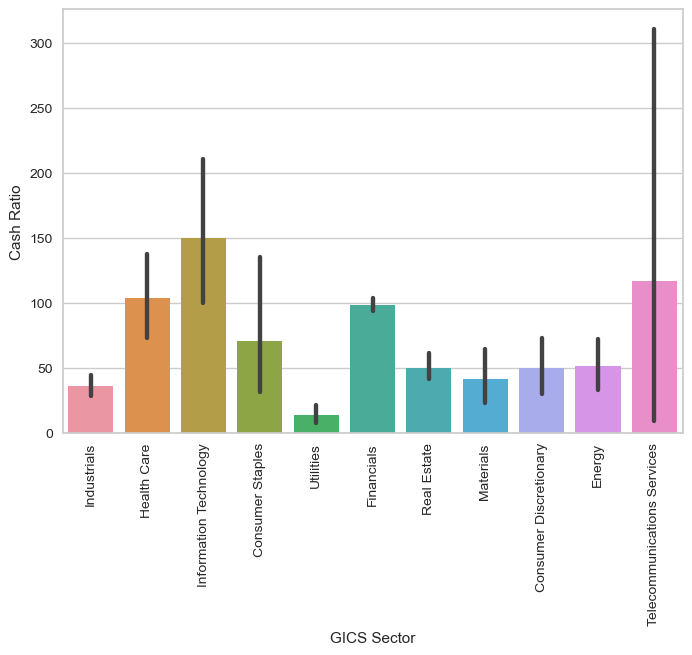

In [28]:
sns.barplot(y = df["Cash Ratio"], x = df["GICS Sector"])
plt.xticks(rotation = 90);

#### Observations:

* Information Technology has the highest cash ratio of any GICS Sector and Utilities has the lowest cash ratio of any GICS Sector

### P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

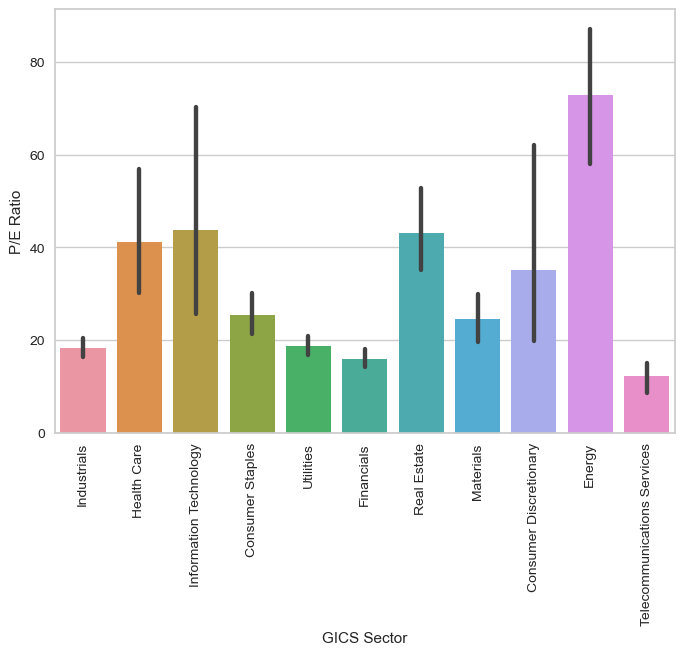

In [29]:
sns.barplot(y = df['P/E Ratio'], x = df['GICS Sector'])
plt.xticks(rotation = 90);

#### Observations:

* The Energy Sector has the highest P/E Ratio followed by Real Estate and Information Technology
* Telecommunicatiosn Services has the lowest P/E Ratio

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [30]:
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

#### Observations:

* There are no missing values

In [31]:
df.duplicated().sum()

0

#### Observations:

* There are duplicate rows

In [32]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df_num.copy()
subset_scaled = scaler.fit_transform(subset)

In [33]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [34]:
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

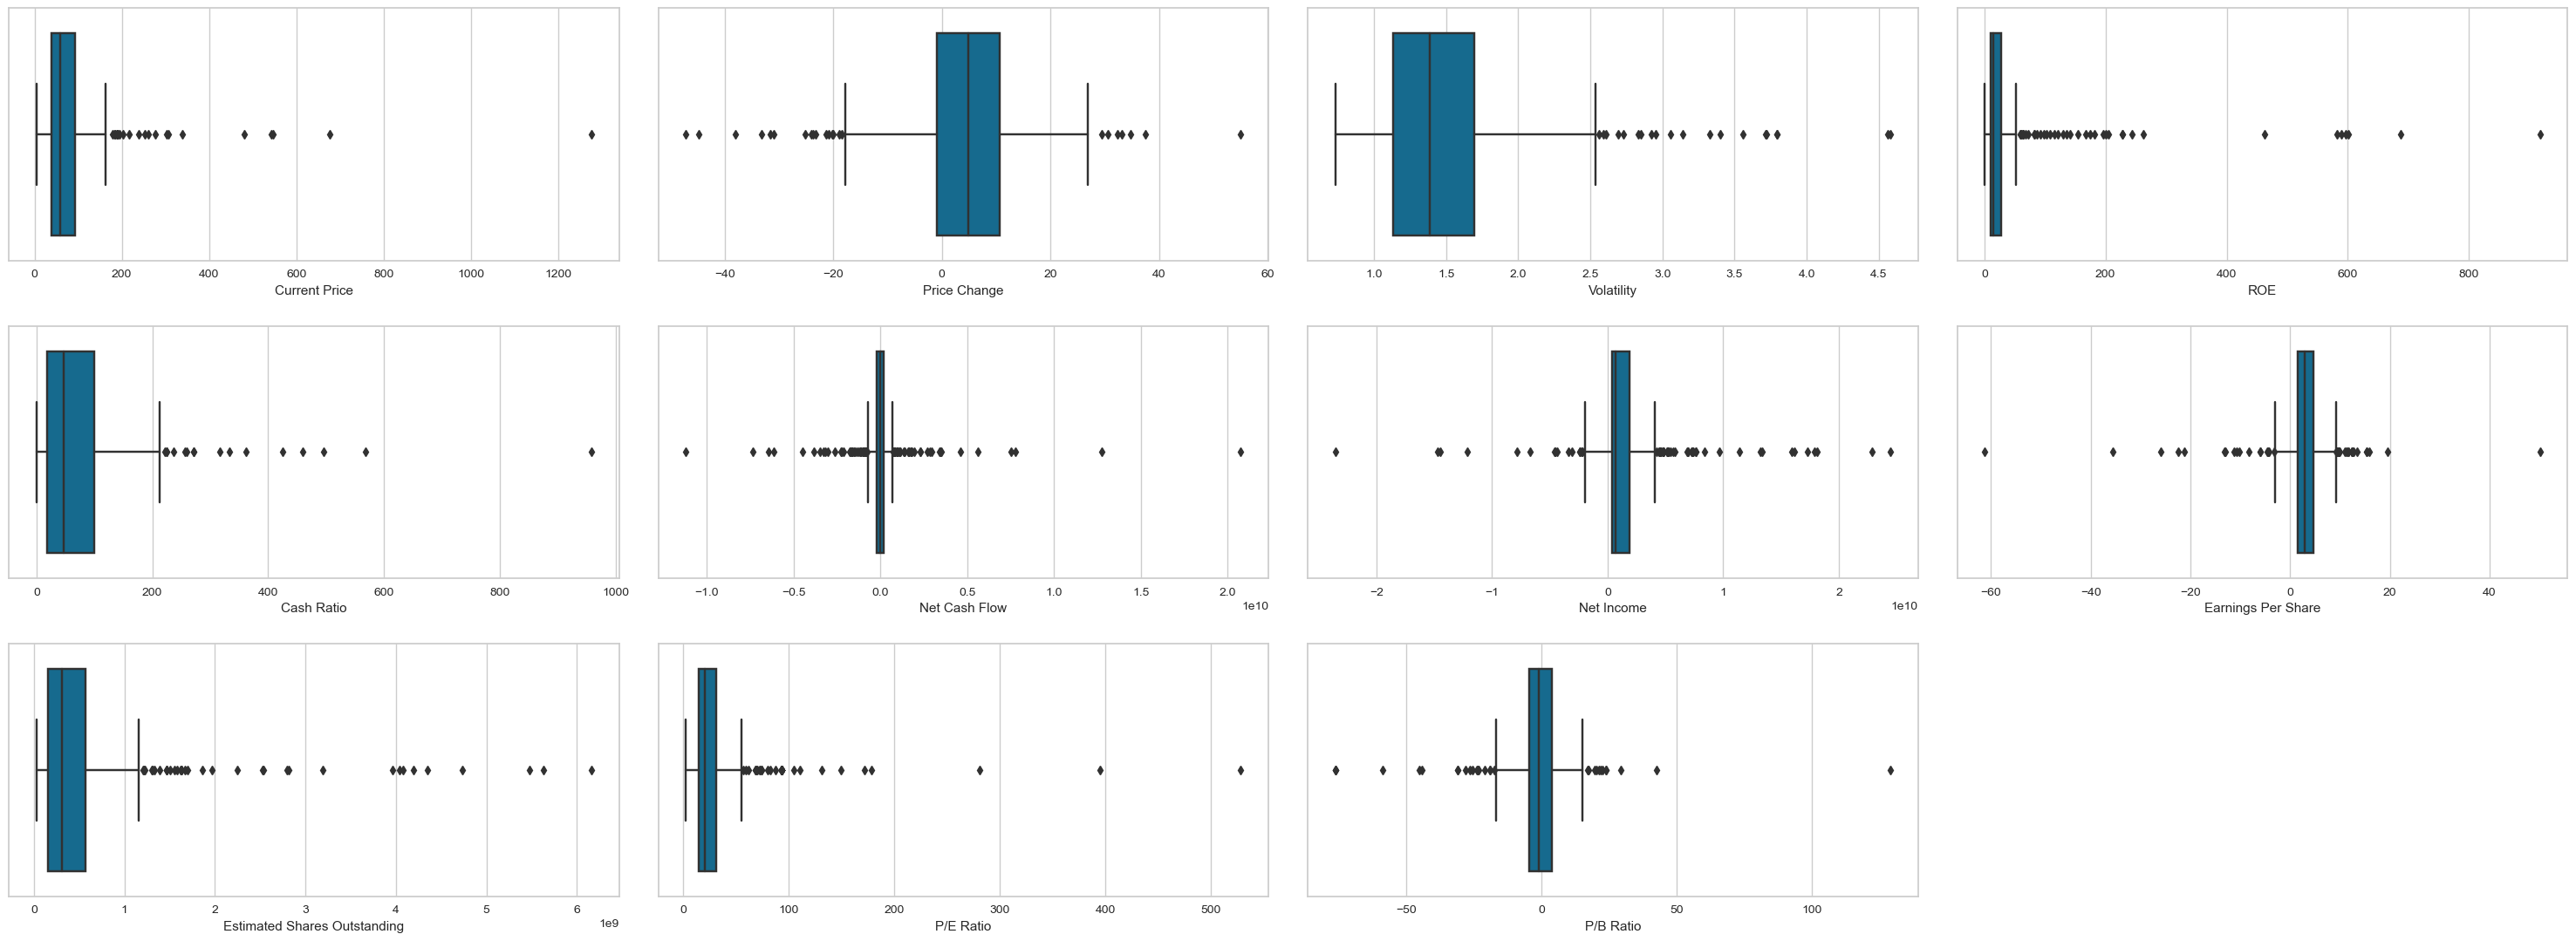

In [35]:
# outlier detection using boxplot from the MLS

plt.figure(figsize=(30, 40))

for i, variable in enumerate(subset_scaled_df):
    plt.subplot(11, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

#### Observations:

* There are a many outliers for each feature, however as I am not an expert in the field, I cannot say whether they are reasonable. There are a few, such as the max values in Current Price, Cash Ratio, and P/B Ratio that stand out as significantly higher than the other values, but that is not to say that they do not belong

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [36]:
subset_scaled_df

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0        -0.393341      0.493950    0.272749  0.989601   -0.210698   
1        -0.220837      0.355439    1.137045  0.937737    0.077269   
2        -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3         0.133567      0.825696   -0.284802 -0.317379    1.218059   
4        -0.260874     -0.492636    0.296470 -0.265515    2.237018   
..             ...           ...         ...       ...         ...   
335      -0.486181      0.901646    0.540121 -0.255142    4.308162   
336      -0.289510     -1.065766   -0.079703  1.062211   -0.476513   
337       0.221913      0.439539   -0.206067 -0.400362    0.332009   
338      -0.547053     -0.436811   -0.097813 -0.369243    0.320933   
339      -0.336453      1.051046    0.142671 -0.078803   -0.055639   

     Net Cash Flow  Net Income  Earnings Per Share  \
0        -0.339355    1.554415            1.309399   
1        -0.002335    0.927628            0.056755   
2         0.454058    0.744371            0.024831   
3        -0.152497   -0.219816           -0.230563   
4         0.133564   -0.202703           -0.374982   
..             ...         ...                 ...   
335      -0.559673   -1.487784           -1.127481   
336       0.053235   -0.051186            0.029391   
337       0.164889   -0.342467           -0.303532   
338      -0.051022   -0.301171           -0.239684   
339       0.111378   -0.293666           -0.318734   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                        0.107863  -0.652487  -0.506653  
1                        1.250274  -0.311769  -0.504205  
2                        1.098021  -0.391502   0.094941  
3                       -0.091622   0.947148   0.424333  
4                        1.978399   3.293307   0.199196  
..                            ...        ...        ...  
335                      0.429111  -0.082116   0.572194  
336                     -0.167741  -0.337154  -0.152012  
337                     -0.460058   2.233634  -1.589390  
338                     -0.377852  -0.222714   0.118680  
339                     -0.092942   0.854902   0.246754  

[340 rows x 11 columns]

### Univariate Analysis

 Current Price 


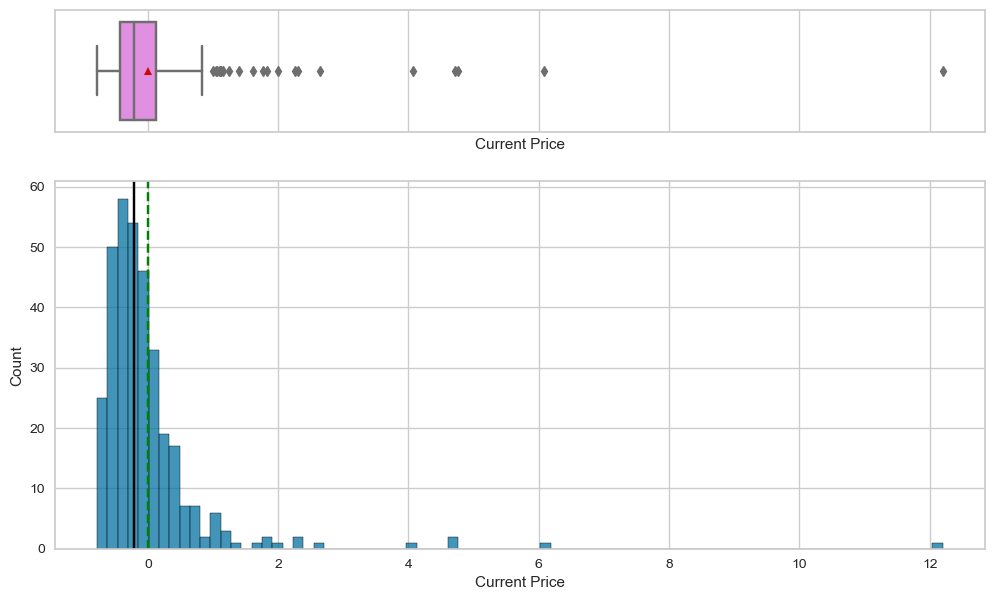

 Price Change 


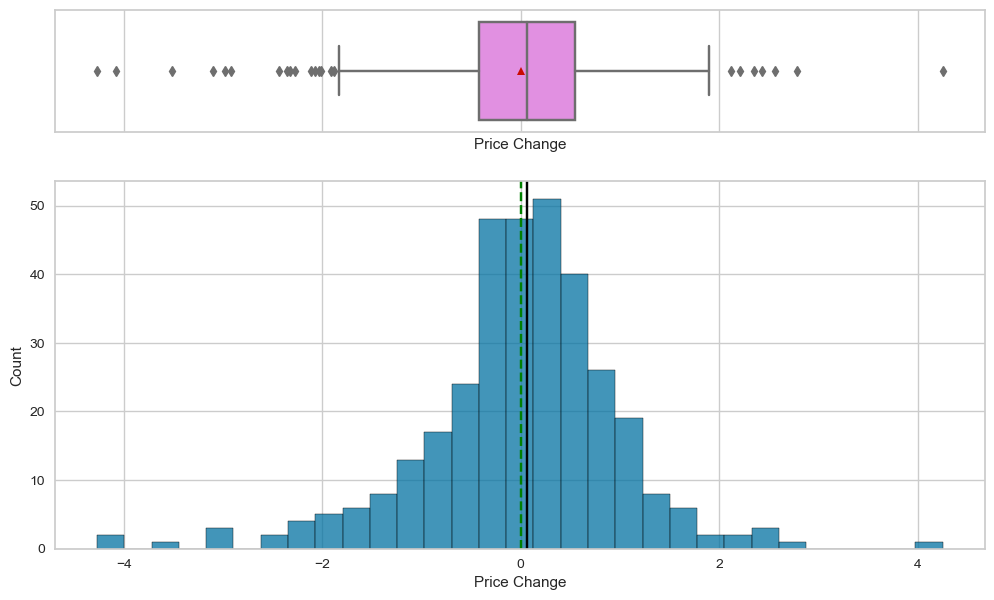

 Volatility 


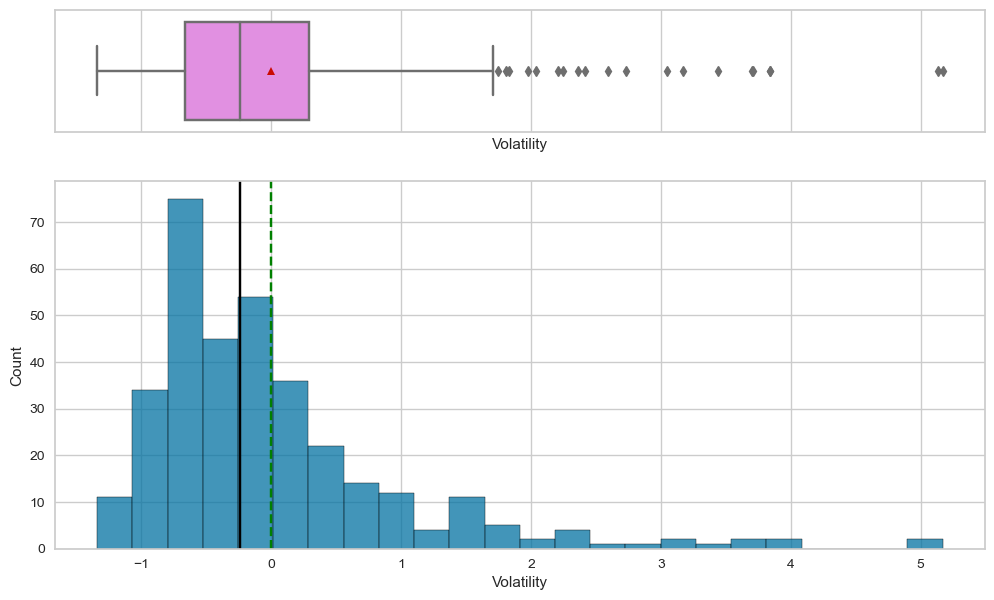

 ROE 


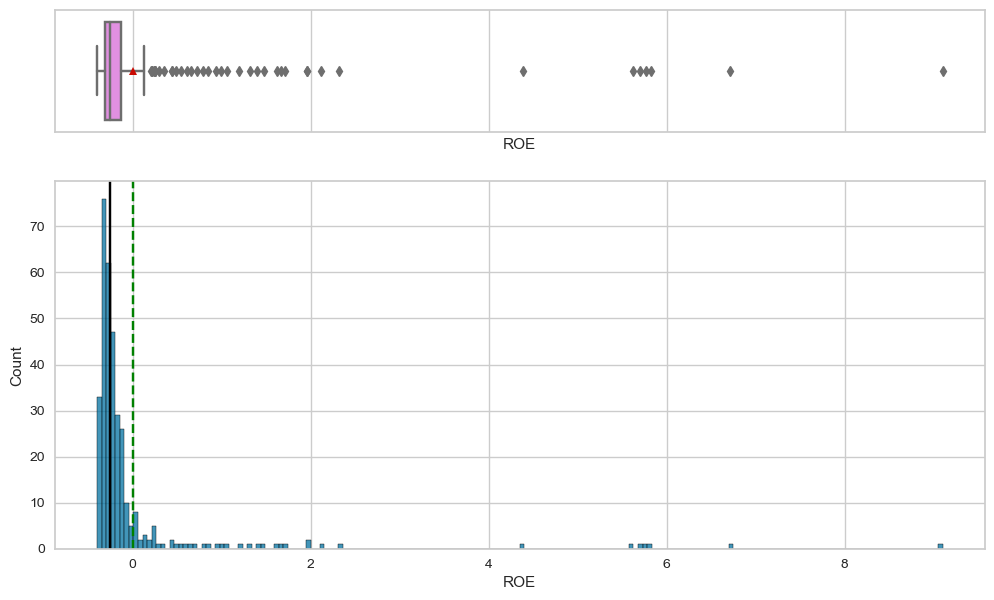

 Cash Ratio 


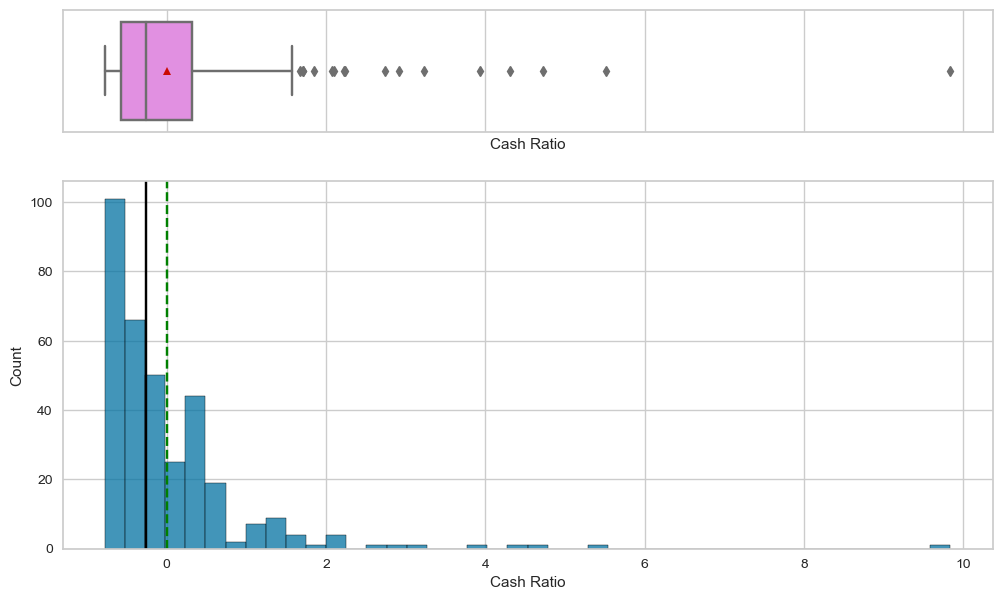

 Net Cash Flow 


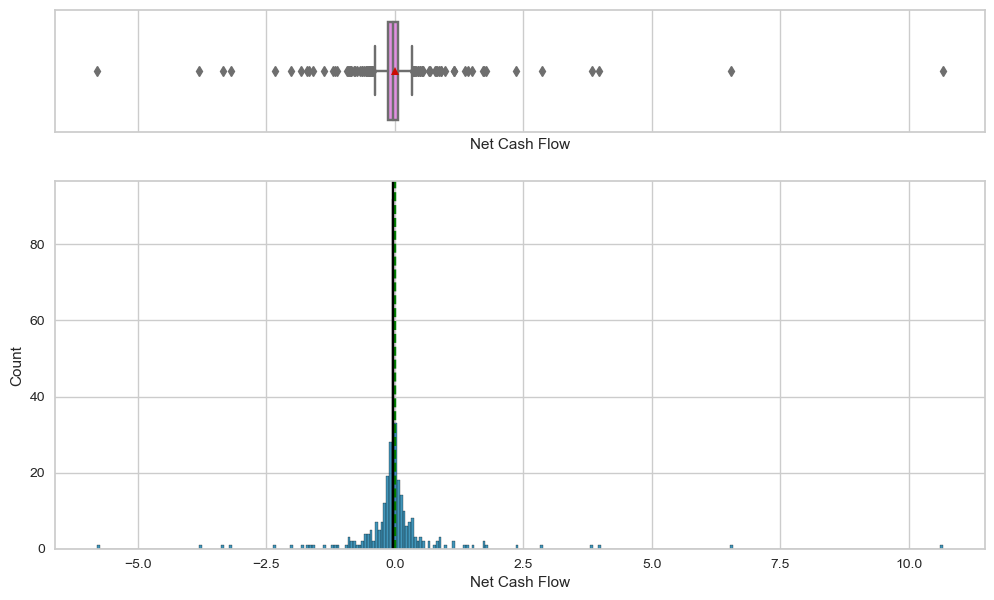

 Net Income 


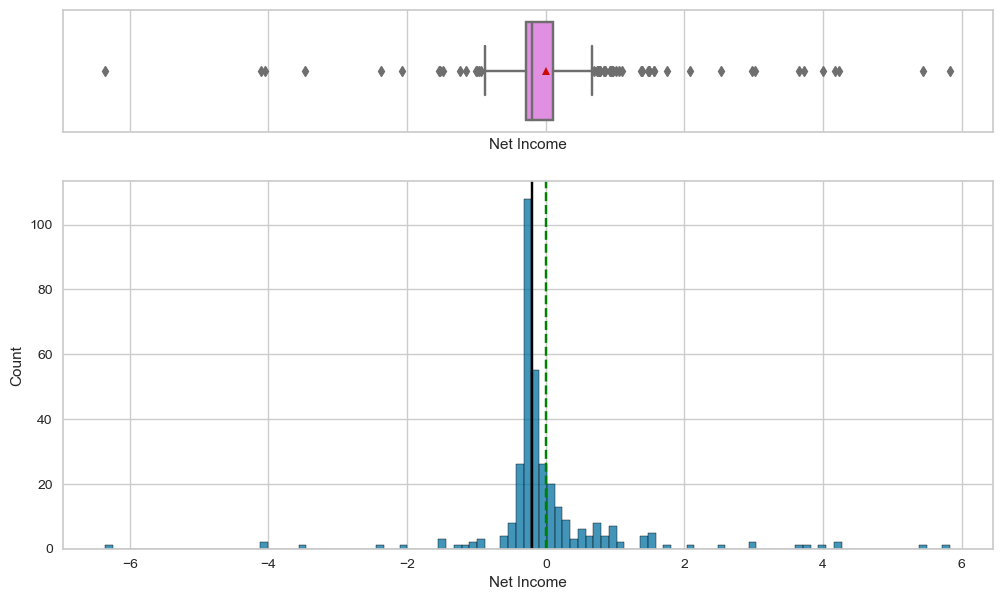

 Earnings Per Share 


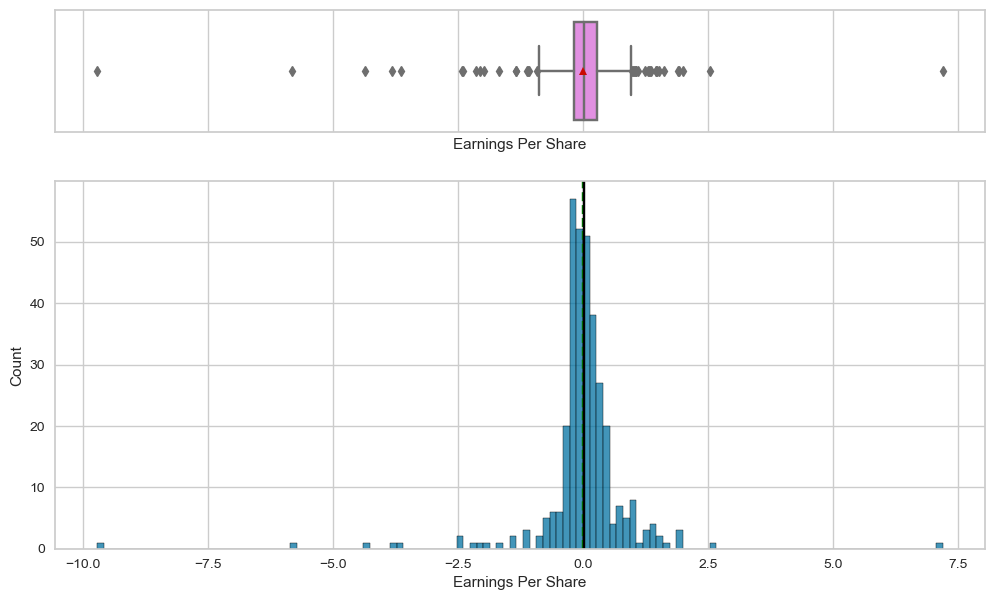

 Estimated Shares Outstanding 


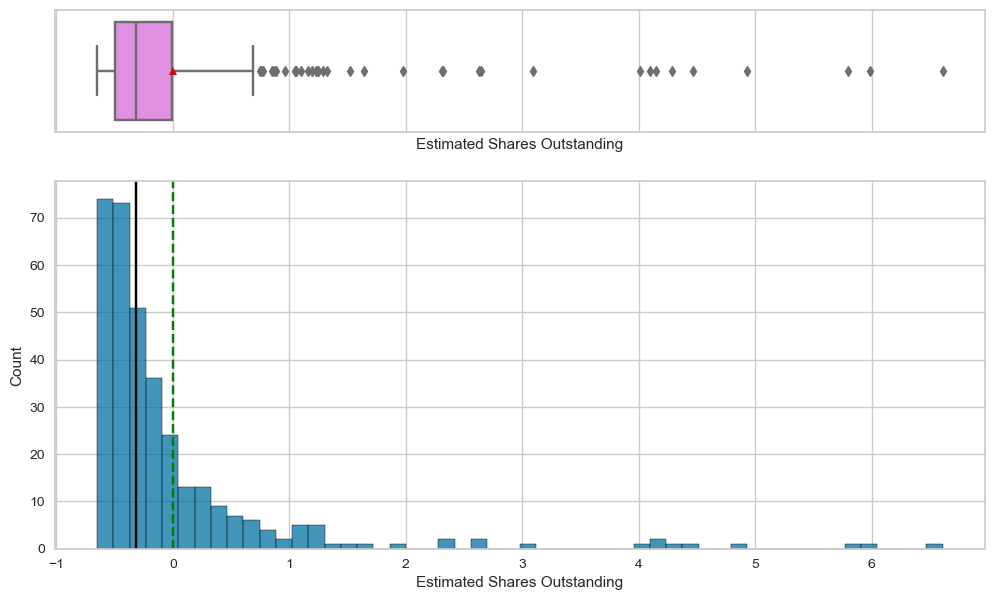

 P/E Ratio 


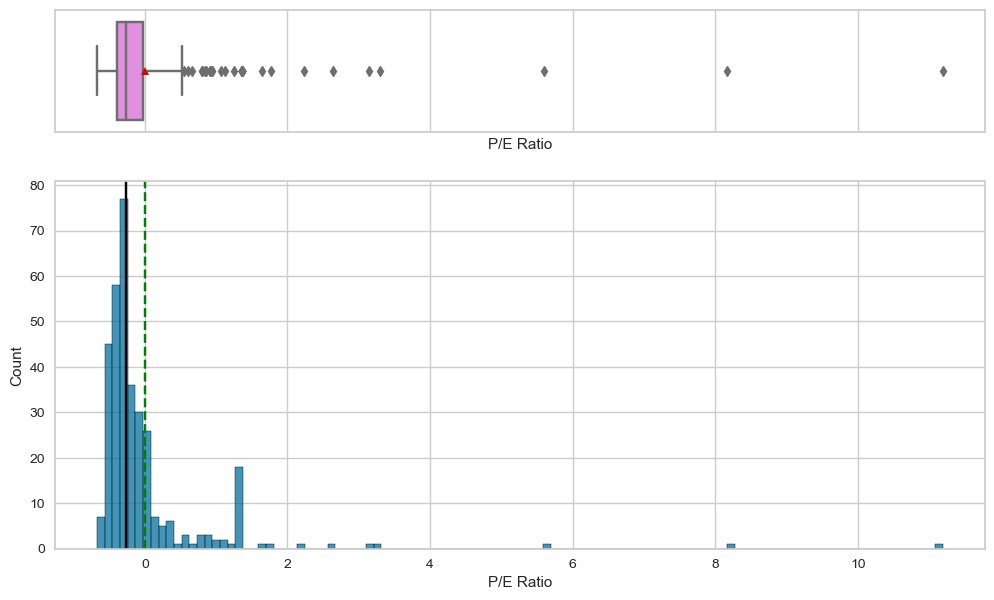

 P/B Ratio 


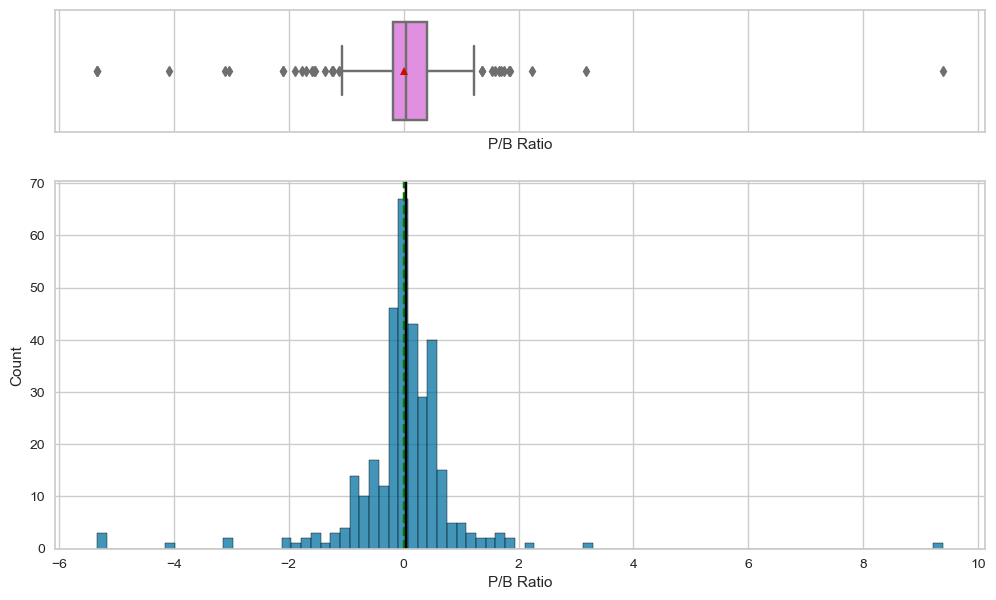

In [37]:
for feature in subset_scaled_df.columns:
    print("\033[1m", feature, "\033[0m", flush = True)
    histogram_boxplot(subset_scaled_df, feature, figsize=(12, 7), kde=False, bins=None)
    plt.show()

## Bivariate Analysis

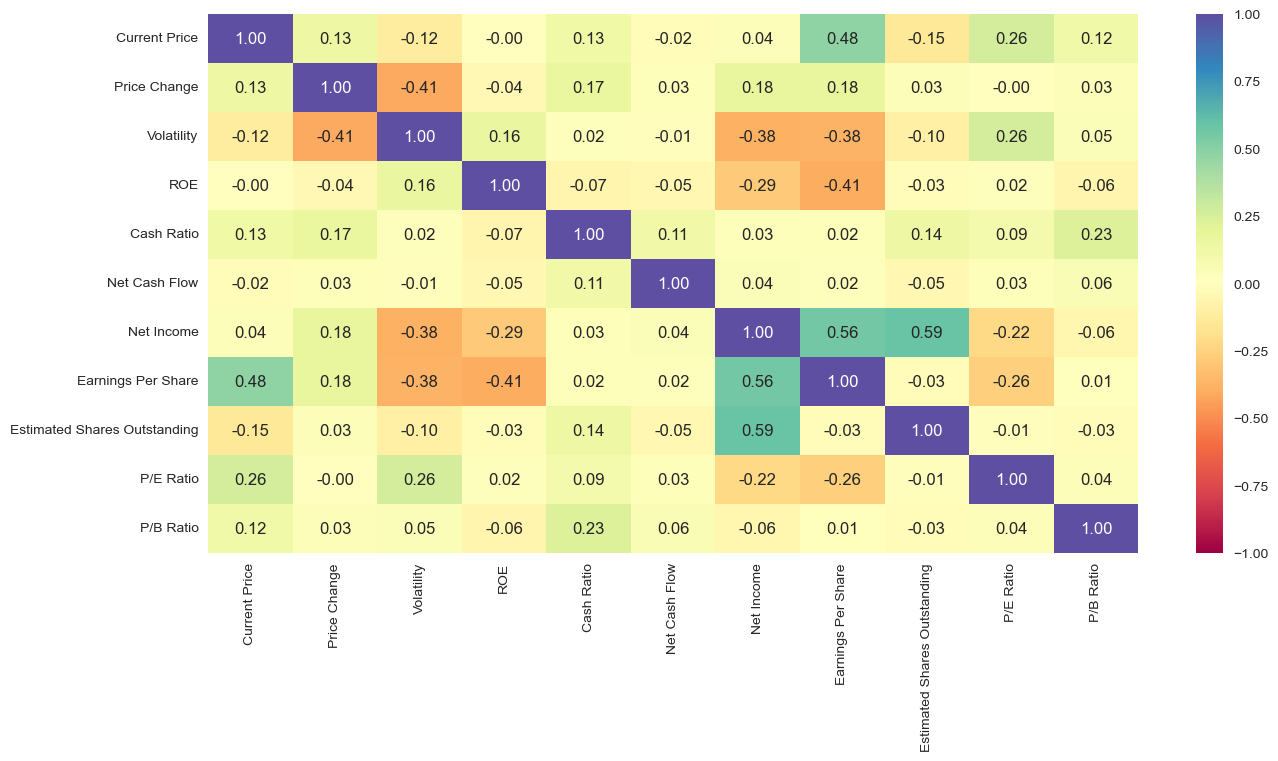

In [38]:
# run a heatmap to check correlation
plt.figure(figsize=(15, 7))
sns.heatmap(subset_scaled_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

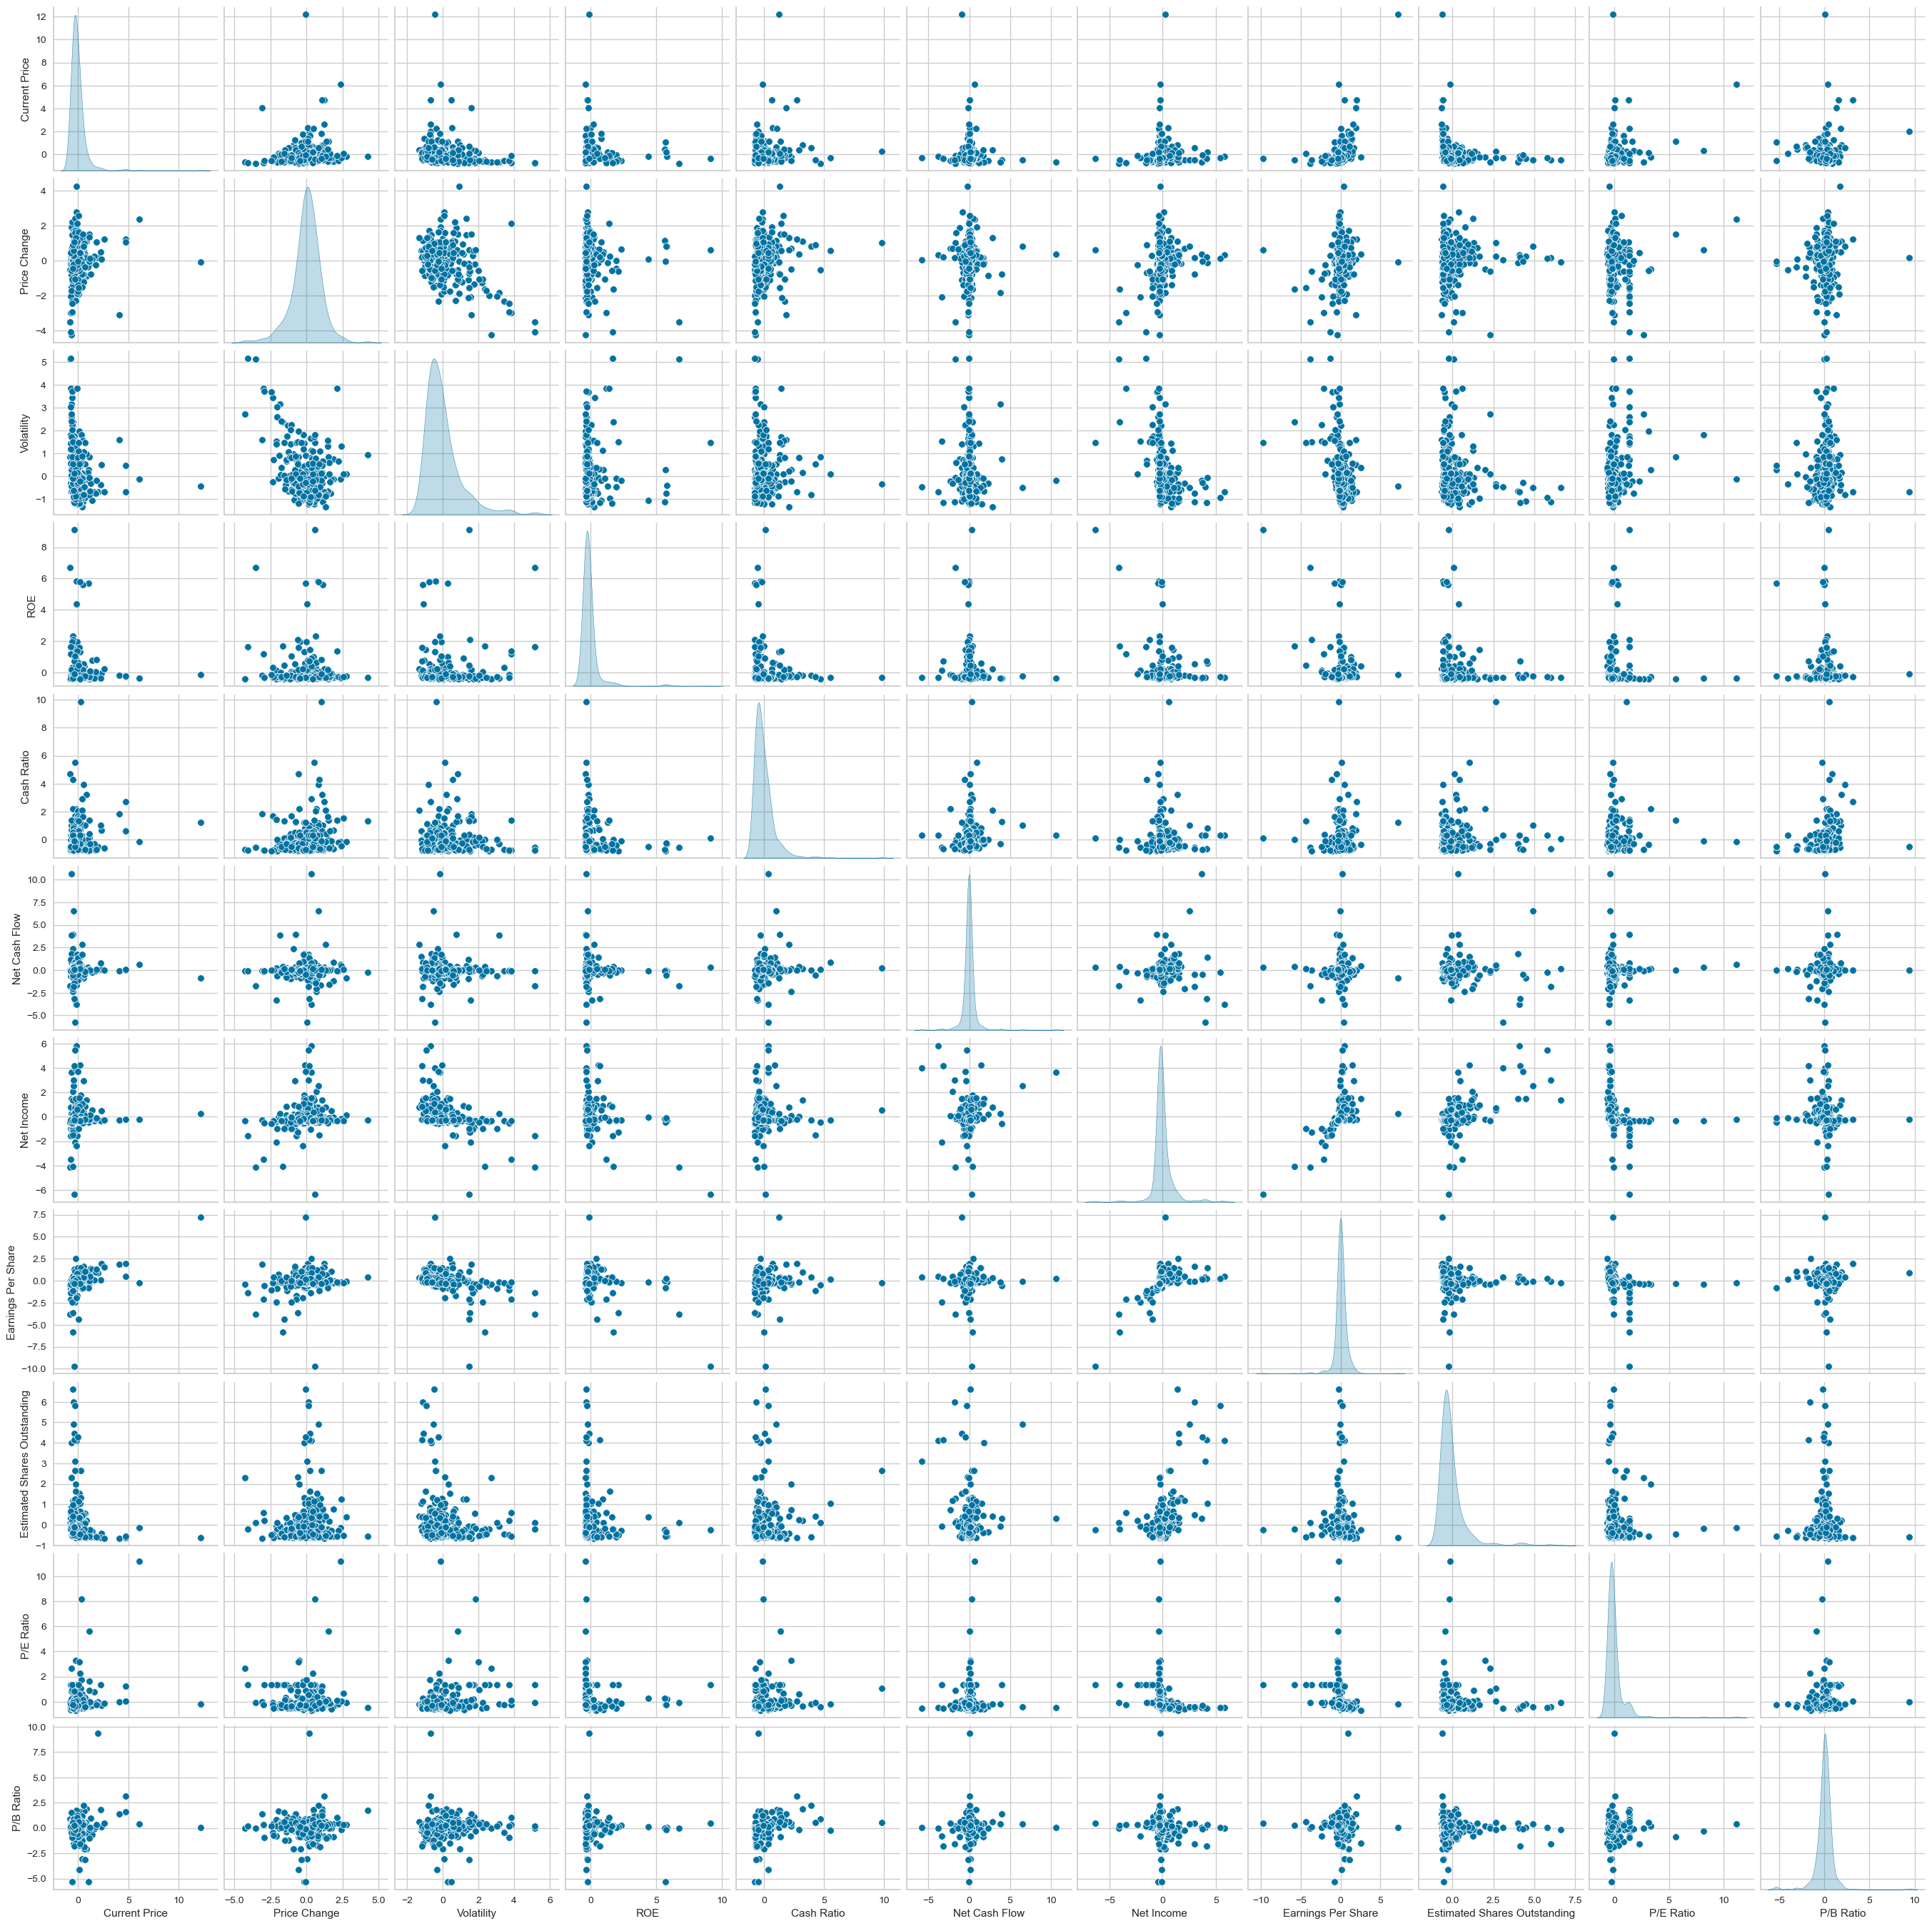

In [39]:
sns.pairplot(data=subset_scaled_df, diag_kind="kde")
plt.show()

#### Observations:
   
* No significant changes in EDA after Data Preprocessing

## K-means Clustering

In [40]:
df_k = df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2683056386104816
Number of Clusters: 4 	Average Distortion: 2.1772040332809537
Number of Clusters: 5 	Average Distortion: 2.1293667864155985
Number of Clusters: 6 	Average Distortion: 2.087058049481252
Number of Clusters: 7 	Average Distortion: 2.0275021752667772
Number of Clusters: 8 	Average Distortion: 1.9741283797108462


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

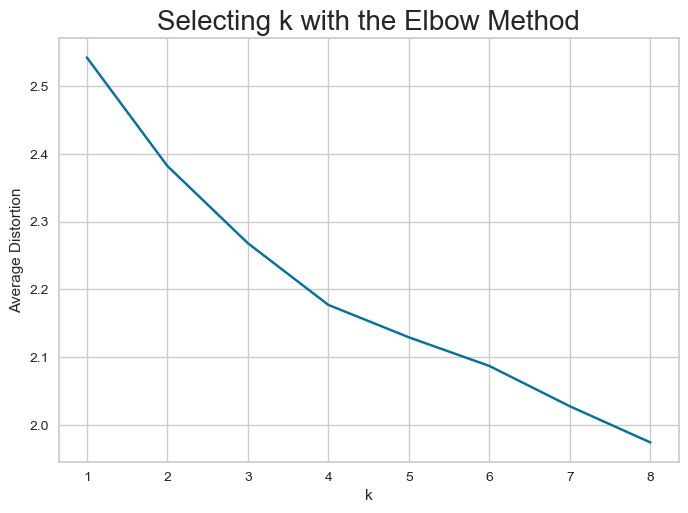

In [41]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

#### Observations:

* The most appropriate number of clusters seems to be 5, based on the Elbow Method

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45755884975007327
For n_clusters = 4, silhouette score is 0.4564091263049953
For n_clusters = 5, silhouette score is 0.4200700306792197
For n_clusters = 6, silhouette score is 0.4168471220569999
For n_clusters = 7, silhouette score is 0.40591399096223746
For n_clusters = 8, silhouette score is 0.4061469592192016
For n_clusters = 9, silhouette score is 0.12514176783026912


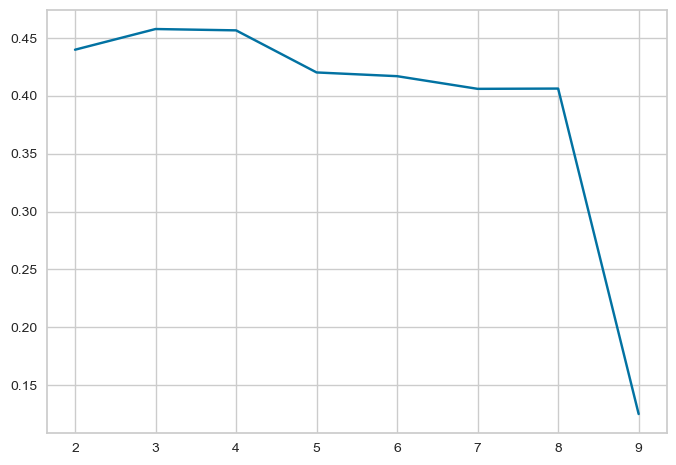

In [42]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

#### Observations:

* For this dataset, 4 clusters gives us the best silhouette score

Clusters:  3


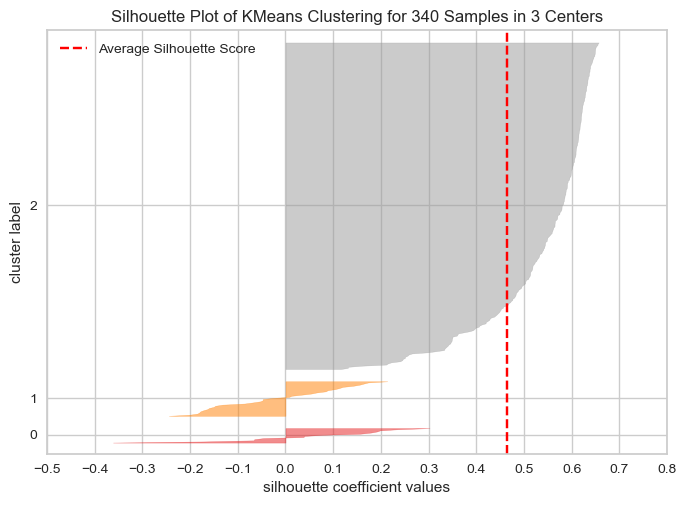

Clusters:  4


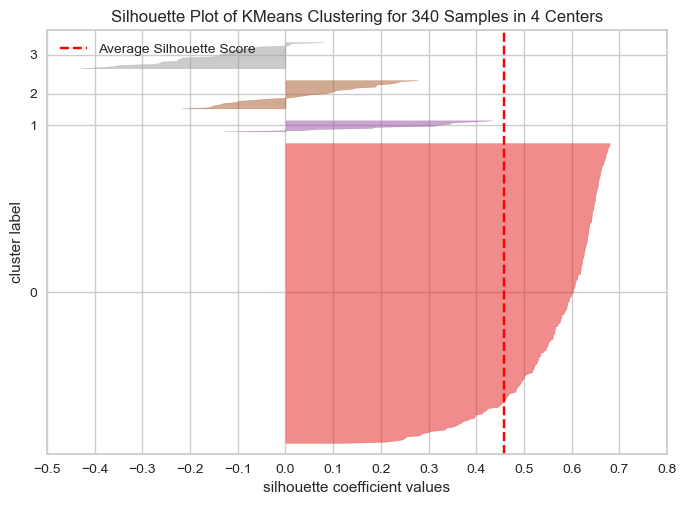

Clusters:  5


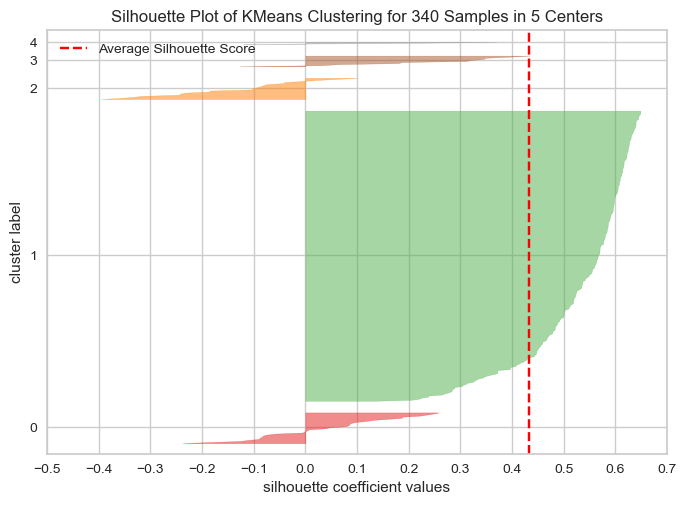

Clusters:  6


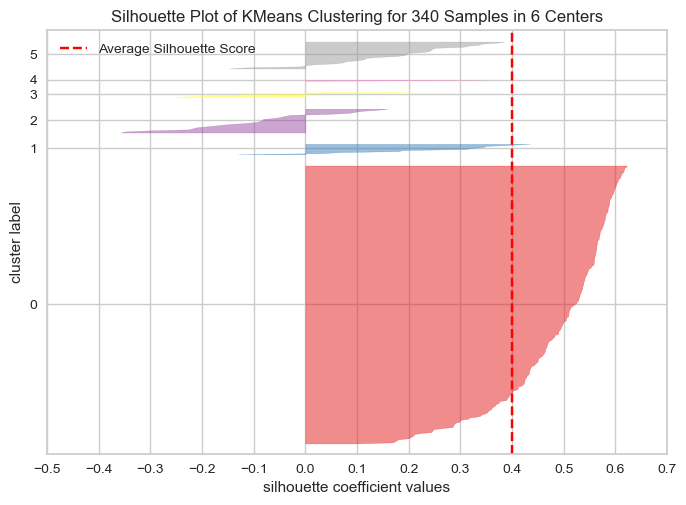

Clusters:  7


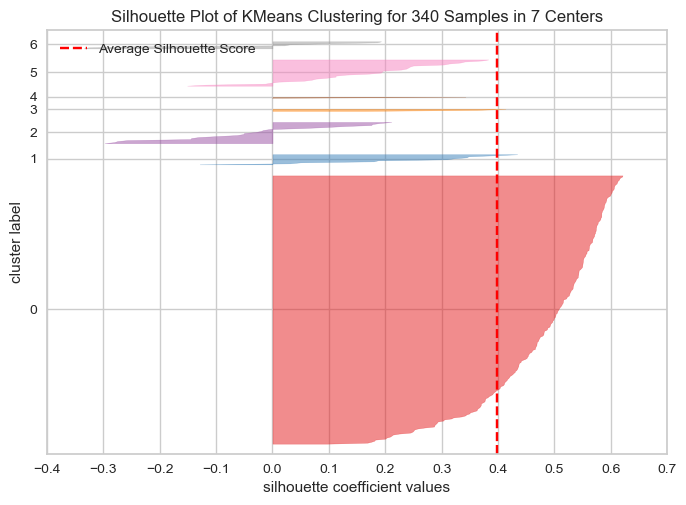

Clusters:  8


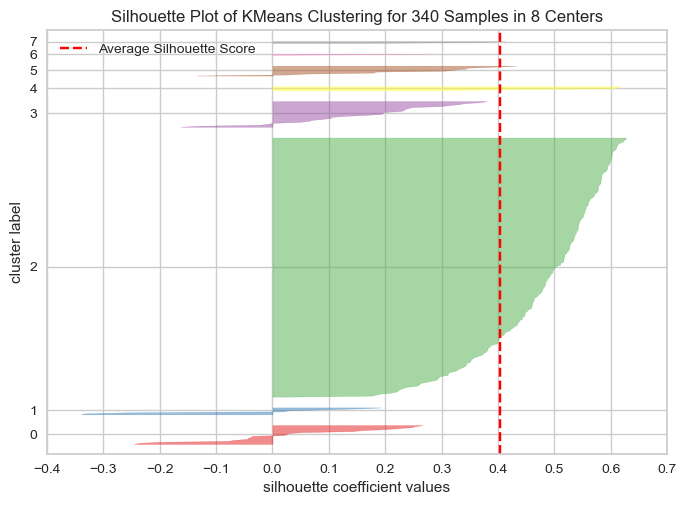

In [43]:
# finding optimal no. of clusters with silhouette coefficients
i = 3
while i != 9:
    print("Clusters: ", i)
    visualizer = SilhouetteVisualizer(KMeans(i, random_state=1))
    visualizer.fit(subset_scaled_df)
    visualizer.show()
    i = i + 1

#### Observations:

* 7 clusters seems to be the best as most of the clusters reach or are close to the average silhouette score 

In [69]:
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=7, random_state=0)

In [70]:
# adding kmeans cluster labels to the original dataframe
df_k["K_means_segments"] = kmeans.labels_

In [71]:
cluster_profile = df_k.groupby("K_means_segments").mean()

In [72]:
df_k['K_means_segments'].value_counts()

6    266
2     28
3     22
1      9
5      7
0      6
4      2
Name: K_means_segments, dtype: int64

In [73]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="red", axis=0)


#### Observations:

#### Cluster 0:
* Contains 6 rows
* Current Price is very high
* Earnings Per Share is very high
* Estimated Shares Outstanding is very low
* P/E Ratio is very high
* P/B Ratio is very high

#### Cluster 1:
* Contains 9 rows
* Volatility is very low
* Net Cash Flow is very low
* Net Income is very high
* Estimated Shares Outstanding is very high

#### Cluster 2:
* Contains 28 rows
* Price Change is very low
* Volatility is very high

#### Cluster 3:
* Contains 22 rows
* Price Change is very high
* Cash Ratio is very high

#### Cluster 4:
* Contains 2 rows
* Current Price is very low
* ROE is very low
* Net Cash Flow is very high
* P/E Ratio is low

#### Cluster 5:
* Contains 7 rows
* ROE is very high
* Cash Ratio is very low
* Net Income is very low
* Earnings Per Share is very low
* P/B Ratio is very low

#### Cluster 6:
* Contains 266 rows
* There are no min or max values
* P/E Ratio is moderately low
* P/B Ratio is moderately low


## Hierarchical Clustering

In [49]:
df_h = df.copy()

In [50]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

In [51]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


#### The highest cophenest correlation is achieved with Euclidean Distance and an average linkage

### Checking Dendograms

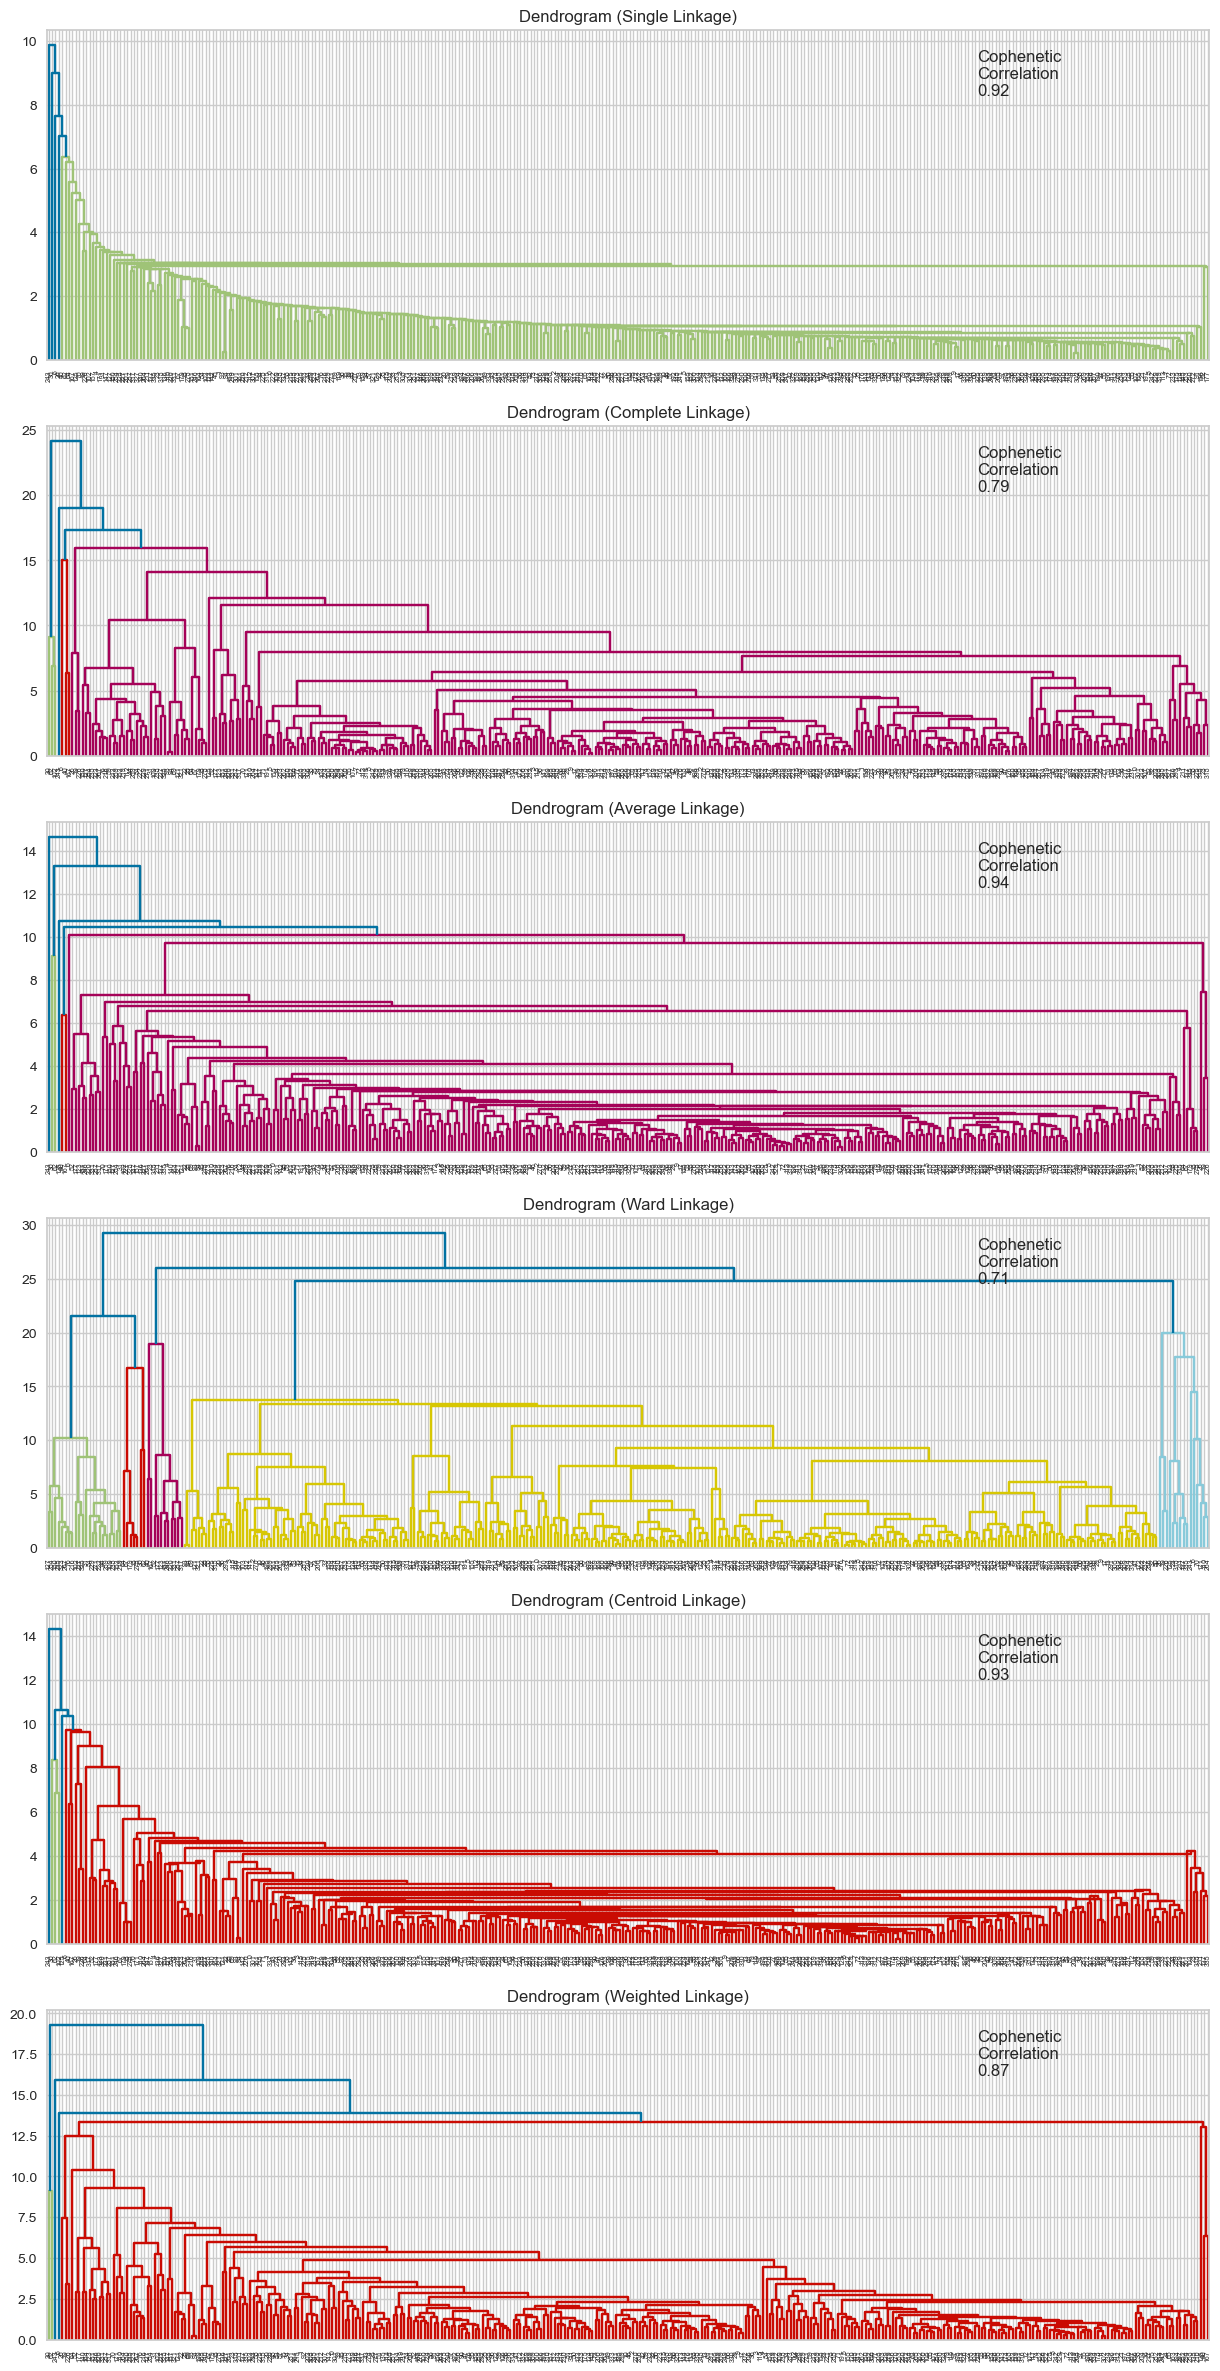

In [52]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", 'ward', 'centroid', "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observations:

* Average linkage had the highest Cophenetic Correlation score so I will go with average linkage
* 5 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [53]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [54]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df_h["HC_Clusters"] = HCmodel.labels_

In [55]:
df_h.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  HC_Clusters  
0                  6.681299e+08    3.718174  -8.784219            0  
1                  1.633016e+09   18.806350  -8.750068            0  
2                  1.504422e+09   15.275510  -0.394171            0  
3                  4.996437e+08   74.555557   4.199651            0  
4                  2.247994e+09  178.451613   1.059810            0

### Cluster Profiling

In [56]:
cluster_profile = df_h.groupby("HC_Clusters").mean()

In [57]:
cluster_profile["count_in_each_segments"] = (
    df_h.groupby("HC_Clusters")["Ticker Symbol"].count().values
)

In [58]:
# let's see the names of the sectors in each cluster
for cl in df_h["HC_Clusters"].unique():
    print("In cluster {}, the following sectors are present:".format(cl))
    print(df_h[df_h["HC_Clusters"] == cl]["Ticker Symbol"].unique())
    print()

In cluster 0, the following sectors are present:
['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APC' 'APH' 'ARNC' 'ATVI'
 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB' 'BK' 'BLL'
 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL' 'CELG' 'CF'
 'CFG' 'CHD' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME' 'CMG' 'CMI' 'CMS'
 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO'
 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLPH' 'DLR'
 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EMN'
 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD'
 'EXPE' 'EXR' 'F' 'FAST' 'FBHS' 'FCX' 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS'
 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP' 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT'
 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN' 'HCP' 'HES' 'HIG' 'HOG' 'HON' 'HPE'

In [59]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="red", axis=0)

#### Observations:

#### Cluster 0:
* Contains 334 rows
* P/B Ratio is very low
* Everything else is average

#### Cluster 1:
* Contains 2 rows
* Net Cash Flow is very high
* Net Income is very high
* P/E Ratio is very low


#### Cluster 2:
* Contains 2 rows
* Current Price is very low
* Price Change is very low
* Volatility is very high
* ROE is very high
* Cash Ratio is very low
* Net Income is very low
* Earnings Per Share is very low

#### Cluster 3:
* Contains 1 row
* Price Change is very high
* ROE is very low
* Cash Ratio is very high
* Estimated Shares Outstanding is very high
* P/E Ratio is very high
* P/B Ratio is very high


#### Cluster 4:
* Contains 1 row
* Current Price is very high
* Volatility is very low
* Net Cash Flow is very low
* Earnings Per Share is very high
* Estimated Shares Outstanding is very low


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

#### Which clustering technique took less time for execution?

#### Observations:

* They took about the same amount of time. Neither method stood out for being exceptionally fast or slow

#### Which clustering technique gave you more distinct clusters, or are they the same?

#### Observations:

* K-means clustering gave more clusters, but they also felt less overfitting.
* While K-means clustering gave 8 clusters and Heirarcichal clustering only gave 5 clusters, the clusters that came from K-means clustering felt more robust. 
    * The Heirarchical clustering ended up giving 1 very large cluster and several very very small clusters, some with only 1 value, each. 
    * The K-means clustering also gave 1 large cluster, but it was smaller than the Heirarcichal cluster, which allowed for the other 4 clusters to contain more values

#### How many observations are there in the similar clusters of both algorithms?

#### Observations:

* K-means clusters:
    * 6, 9, 28, 22, 2, 7, 266
* Heircichal clusters:
    * 334, 2, 2, 1, 

#### How many clusters are obtained as the appropriate number of clusters from both algorithms?

#### Observations:

* Using K-means clustering, I came up with 7 clusters
* Using Heirarcichal clustering, I came up with 5 clusters

#### Noteable  Similarities:

* The largest clusters (K-means cluster 6 and Heirarcichal cluster 0) seemed to have low P/B Ratios and P/E Ratios
* Other than the aforementioned Ratios, the largest clusters had no min or max values
* Other similarities between many of the clusters in K-means and Heirarcichal clustering:
    * K-means cluster 2 and Heirarcichal cluster 2:
        * Price Change is low, Volatility is high
    * K-means cluster 5 and Heirarcichal cluster 2:
        * ROE is high, Cash Ratio is low, Net Income is low, Earnings Per Share is low
    * K-means cluster 3 and Heirarcichal cluster 3:
        * Price Change is high, Cash Ratio is high
    * K-means cluster 4 and Heirarcichal cluster 1:
        * Net Cash Flow is high, P/E Ratio is low
    * K-means cluster 0 and Heirarcichal cluster 4:
        * Current Price is high, Earnings Per Share is high, Estimated Shares Outstanding is low

### Conclusion:

* For this dataset, the K-means clustering seems to be the better method. There are more clusters, but the clusters are more robust and can give more insight into the values of each observation within the cluster than the Heirarcichal clustering method.
* Therefore, the Actionable Insights and Recommendations will be made based off of the K-means clusters

## Actionable Insights and Recommendations

#### Using K-Means Clustering:

<u>Cluster 1:</u> <b>Low Risk</b>
* Low volatility indicates price stability.
* High net income suggests financial strength.
* High estimated shares outstanding might dilute ownership but doesn’t necessarily pose immediate risk.
* Low net cash flow may be a concern, but the other factors offset it.

<u>Cluster 2:</u> <b>Moderate Risk</b>
* Low price change implies price stability, which can be less risky.
* High volatility is contradictory and needs further investigation. It could indicate unpredictability in certain stocks within the cluster.

<u>Cluster 3:</u> <b>Moderate to High Risk</b>
* High price change and high volatility indicate significant price fluctuations, which can be risky.
* High cash ratio is a positive sign for stability but may not offset the price volatility entirely.

<u>Cluster 4:</u> <b>Moderate to High Risk</b>
* Low current price may suggest undervaluation or financial issues.
* Low ROE and very low net income are concerning for profitability.
* High net cash flow is a positive sign but may not outweigh other risks.

<u>Cluster 5:</u> <b>Moderate Risk</b>
* High ROE indicates strong profitability.
* Low cash ratio and very low net income are concerning.
* Low P/B ratio may suggest undervaluation.

<u>Cluster 6:</u> <b>Moderate Risk</b>
* The absence of minimum or maximum values indicates that the stocks in this cluster might have relatively stable valuation metrics compared to clusters with extreme values, suggesting a balanced risk-reward profile.